PREPARAÇÃO DE DADOS - DEEPFASHION-1
Projeto: Reconhecimento de Roupas para Deficientes Visuais
Dataset encontrado no Kaggle: /kaggle/input/deepfashion-1

Usando dataset em: /kaggle/input/deepfashion-1

------------------------------------------------------------
ETAPA 1: Explorando estrutura do dataset
------------------------------------------------------------

Explorando estrutura do dataset em: /kaggle/input/deepfashion-1
Percorrendo arquivos...

ESTRUTURA DO DATASET
Total de arquivos: 34465
Total de imagens: 34452

Extensões encontradas:
  .png: 34452 arquivos

Total de diretórios: 10
Primeiros 10 diretórios:
  datasets
  datasets/train_images
  datasets/texture_ann
  datasets/segm
  datasets/shape_ann
  datasets/densepose
  datasets/test_images
  datasets/texture_ann/val
  datasets/texture_ann/test
  datasets/texture_ann/train

Exemplos de caminhos de imagens (primeiras 5):
  /kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Sweaters-id_00005253-06_1_front.png
  /kaggle/inp

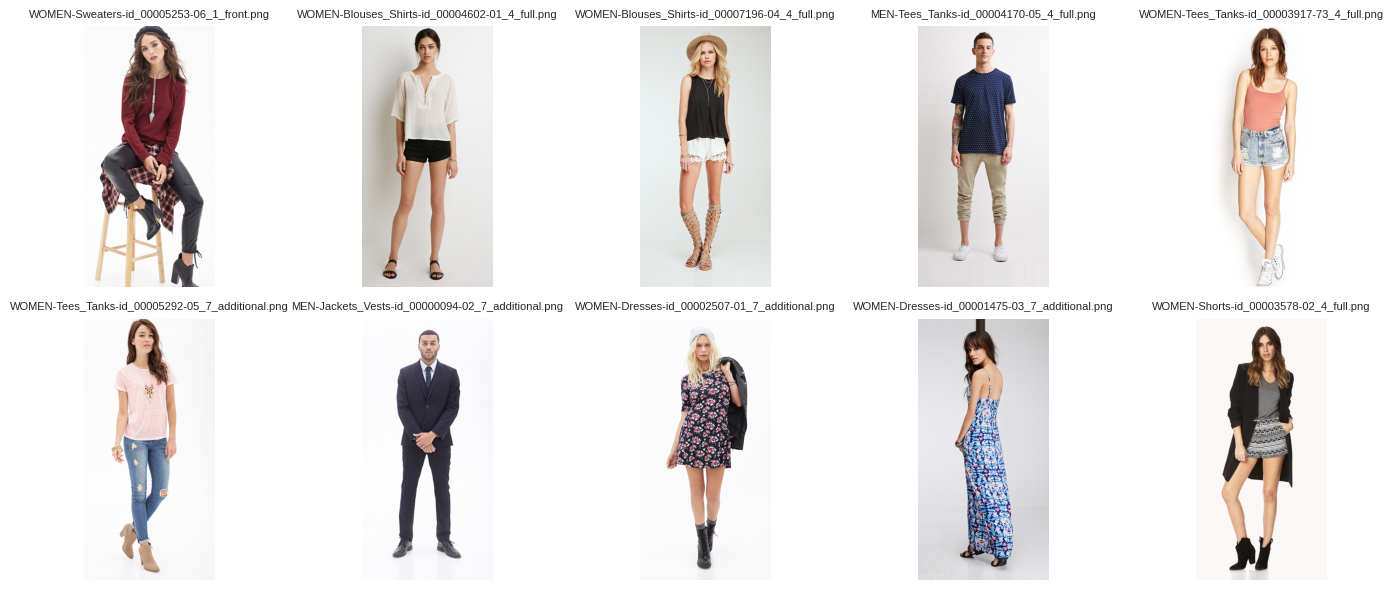


------------------------------------------------------------
ETAPA 3: Extraindo categorias dos nomes dos arquivos
------------------------------------------------------------

Extraindo categorias dos nomes dos arquivos...
Total de imagens encontradas: 34452
Categorias extraídas de 34452 imagens
Categorias únicas encontradas: 17

Primeiras categorias:
categoria
Tees_Tanks           8655
Dresses              6513
Blouses_Shirts       4578
Sweaters             2253
Shorts               2064
Pants                1974
Rompers_Jumpsuits    1836
Jackets_Coats        1407
Skirts               1152
Cardigans            1143
Name: count, dtype: int64

------------------------------------------------------------
ETAPA 4: Analisando distribuição de categorias
------------------------------------------------------------
Gráfico salvo como 'bloco01_distribuicao_categorias.png'


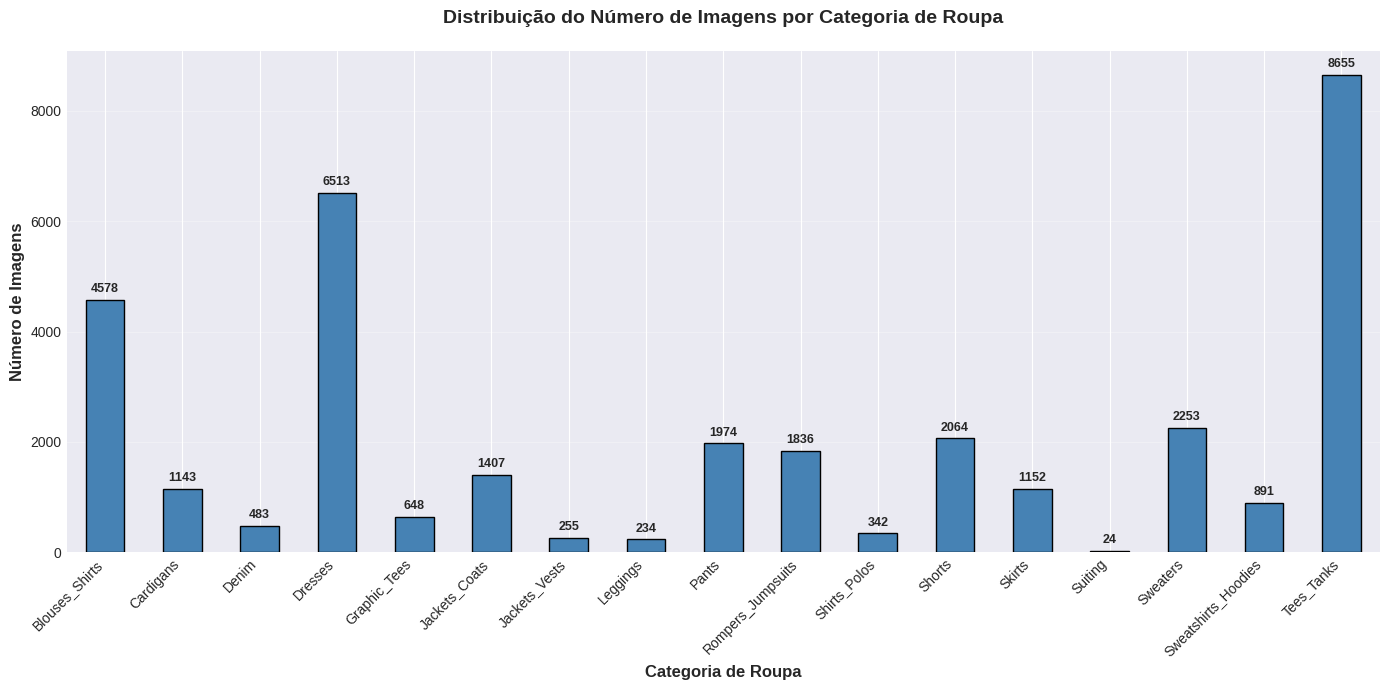


ESTATÍSTICAS DA DISTRIBUIÇÃO
Total de categorias: 17
Total de imagens: 34452
Média de imagens por categoria: 2026.59
Mediana: 1152.00
Desvio padrão: 2389.66

Categoria com mais imagens: Tees_Tanks (8655 imagens)
Categoria com menos imagens: Suiting (24 imagens)

PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!
Total de imagens encontradas: 34452
Total de categorias: 17
Próximo passo: Execute o script 02_preprocessamento.py
Resumo salvo em: bloco01_saida.txt


In [1]:
"""
Script de Preparação de Dados para Classificação de Roupas
Projeto: Reconhecimento de categoria de roupas para pessoas com deficiência visual
Dataset: DeepFashion-1 (Kaggle)
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import zipfile
from pathlib import Path
import kagglehub
import gdown

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def baixar_dataset_kaggle():
    """
    Baixa o dataset DeepFashion-1 do Kaggle usando kagglehub.
    
    Returns:
        str: Caminho para os arquivos do dataset
    
    Exemplo de uso:
        path = baixar_dataset_kaggle()
        print(f"Dataset baixado em: {path}")
    """
    # No Kaggle, os datasets já estão disponíveis em /kaggle/input/
    kaggle_path = '/kaggle/input/deepfashion-1'
    if os.path.exists(kaggle_path):
        print(f"Dataset encontrado no Kaggle: {kaggle_path}")
        return kaggle_path
    
    # Se não estiver no Kaggle, tenta baixar usando kagglehub
    try:
        path = kagglehub.dataset_download("vishalbsadanand/deepfashion-1")
        print("Caminho para os arquivos do dataset:", path)
        return path
    except Exception as e:
        print(f"Erro ao baixar dataset: {e}")
        print("Tentando usar caminho padrão do Kaggle...")
        return kaggle_path

def baixar_dataset_google_drive(drive_file_id, output_path='./deepfashion_data.zip'):
    """
    Alternativa: Baixa o dataset do Google Drive (caso prefira usar esta opção).
    
    Args:
        drive_file_id (str): ID do arquivo no Google Drive
        output_path (str): Caminho onde o arquivo será salvo
    
    Returns:
        str: Caminho do arquivo baixado
    
    Nota:
        Para usar esta função, insira o ID do seu arquivo Google Drive no parâmetro drive_file_id
        Exemplo: drive_file_id = "SEU_ID_AQUI"
    """
    
    # URL do Google Drive no formato correto
    url = f'https://drive.google.com/uc?id={drive_file_id}'
    
    # Baixa o arquivo
    print(f"Baixando dataset do Google Drive...")
    gdown.download(url, output_path, quiet=False)
    
    # Extrai o arquivo zip
    print(f"Extraindo arquivo...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall('./deepfashion_data')
    
    return './deepfashion_data'

def explorar_estrutura_dataset(dataset_path):
    """
    Explora e exibe a estrutura de diretórios do dataset.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        dict: Dicionário com informações sobre a estrutura do dataset
    """
    if not os.path.exists(dataset_path):
        print(f"ERRO: Caminho não encontrado: {dataset_path}")
        return None
    
    print(f"\nExplorando estrutura do dataset em: {dataset_path}")
    
    # Converte para objeto Path para facilitar navegação
    path = Path(dataset_path)
    
    # Dicionário para armazenar informações
    info = {
        'total_arquivos': 0,
        'total_imagens': 0,
        'diretorios': [],
        'extensoes': {},
        'caminhos_imagens': []  # Armazena caminhos das imagens
    }
    
    print("Percorrendo arquivos...")
    
    # Percorre todos os arquivos e diretórios
    for item in path.rglob('*'):
        if item.is_file():
            info['total_arquivos'] += 1
            # Verifica se é uma imagem
            if item.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                info['total_imagens'] += 1
                info['caminhos_imagens'].append(str(item))
                # Conta extensões
                ext = item.suffix.lower()
                info['extensoes'][ext] = info['extensoes'].get(ext, 0) + 1
        elif item.is_dir():
            info['diretorios'].append(str(item.relative_to(path)))
    
    # Exibe informações
    print("\n" + "=" * 60)
    print("ESTRUTURA DO DATASET")
    print("=" * 60)
    print(f"Total de arquivos: {info['total_arquivos']}")
    print(f"Total de imagens: {info['total_imagens']}")
    print(f"\nExtensões encontradas:")
    for ext, count in info['extensoes'].items():
        print(f"  {ext}: {count} arquivos")
    print(f"\nTotal de diretórios: {len(info['diretorios'])}")
    print(f"Primeiros 10 diretórios:")
    for dir_name in info['diretorios'][:10]:
        print(f"  {dir_name}")
    
    if info['caminhos_imagens']:
        print(f"\nExemplos de caminhos de imagens (primeiras 5):")
        for img_path in info['caminhos_imagens'][:5]:
            print(f"  {img_path}")
    
    return info

def carregar_anotacoes(dataset_path):
    """
    Carrega as anotações do dataset (categorias, etc.).
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        pd.DataFrame: DataFrame com as anotações
    
    Nota:
        Esta função assume que existe um arquivo de anotações no dataset.
        Ajuste conforme a estrutura real do DeepFashion-1.
    """
    # Procura por arquivos de anotação comuns
    path = Path(dataset_path)
    annotation_files = list(path.rglob('*.csv')) + list(path.rglob('*.txt')) + list(path.rglob('*.json'))
    
    print(f"Arquivos de anotação encontrados: {len(annotation_files)}")
    for f in annotation_files[:5]:
        print(f"  {f.name}")
    
    # Tenta carregar o primeiro arquivo CSV encontrado
    csv_files = [f for f in annotation_files if f.suffix == '.csv']
    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"\nCarregado: {csv_files[0].name}")
        print(f"Shape: {df.shape}")
        print(f"Colunas: {df.columns.tolist()}")
        return df
    
    return None

def criar_mapeamento_categorias():
    """
    Cria mapeamento de categorias de roupas.
    
    Returns:
        dict: Dicionário de categorias
    
    Nota:
        Estas categorias são baseadas no dataset DeepFashion.
        Ajuste conforme necessário para seu caso específico.
    """
    # Categorias principais de roupas
    categorias_roupas = {
        0: 'Camisa',
        1: 'Calça',
        2: 'Vestido',
        3: 'Casaco',
        4: 'Saia',
        5: 'Shorts',
        6: 'Blusa',
        7: 'Jaqueta',
        8: 'Suéter',
        9: 'Camiseta'
    }
    
    return categorias_roupas

def visualizar_primeiras_imagens(dataset_path, num_imagens=10):
    """
    Visualiza as primeiras N imagens do dataset.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
        num_imagens (int): Número de imagens a visualizar (padrão: 10)
    
    Returns:
        None (exibe o gráfico)
    """
    # Buscando imagens em: {dataset_path}
    print(f"\nBuscando imagens em: {dataset_path}")
    
    # Encontra todas as imagens
    path = Path(dataset_path)
    
    # Tenta diferentes extensões
    imagens = []
    for ext in ['*.jpg', '*.jpeg', '*.JPG', '*.JPEG', '*.png', '*.PNG']:
        imagens.extend(list(path.rglob(ext)))
        if len(imagens) >= num_imagens:
            break
    
    imagens = imagens[:num_imagens]
    
    print(f"Encontradas {len(imagens)} imagens para visualização")
    
    if not imagens:
        print("AVISO: Nenhuma imagem encontrada no dataset!")
        return
    
    # Calcula layout do grid
    cols = 5
    rows = (len(imagens) + cols - 1) // cols
    
    # Cria figura
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten() if len(imagens) > 1 else [axes]
    
    # Plota cada imagem
    print("Carregando imagens...")
    for idx, img_path in enumerate(imagens):
        try:
            # Carrega e exibe a imagem
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            # Adiciona título com nome do arquivo
            axes[idx].set_title(img_path.name, fontsize=8)
            print(f"  Imagem {idx+1}/{len(imagens)}: {img_path.name}")
        except Exception as e:
            print(f"Erro ao carregar {img_path}: {e}")
    
    # Remove eixos extras
    for idx in range(len(imagens), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('bloco01_primeiras_10_imagens.png', dpi=150, bbox_inches='tight')
    print("\nGráfico salvo como 'bloco01_primeiras_10_imagens.png'")
    plt.show()

def extrair_categorias_dos_arquivos(dataset_path):
    """
    Extrai categorias das imagens baseado nos nomes dos arquivos.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        pd.DataFrame: DataFrame com caminhos e categorias extraídas
    
    Nota:
        Assume que os nomes dos arquivos seguem o padrão: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
        Exemplo: WOMEN-Sweaters-id_00000080-01_1_front.jpg
    """
    print("\nExtraindo categorias dos nomes dos arquivos...")
    
    path = Path(dataset_path)
    
    # Encontra todas as imagens
    imagens = []
    for ext in ['*.jpg', '*.jpeg', '*.JPG', '*.JPEG', '*.png', '*.PNG']:
        imagens.extend(list(path.rglob(ext)))
    
    print(f"Total de imagens encontradas: {len(imagens)}")
    
    dados = []
    for img_path in imagens:
        nome_arquivo = img_path.stem  # Nome sem extensão
        partes = nome_arquivo.split('-')
        
        # Tenta extrair a categoria (geralmente é a segunda parte)
        if len(partes) >= 2:
            categoria = partes[1]  # Ex: "Sweaters" de "WOMEN-Sweaters-id_00000080"
            dados.append({
                'caminho': str(img_path),
                'nome_arquivo': img_path.name,
                'categoria': categoria
            })
    
    df = pd.DataFrame(dados)
    
    print(f"Categorias extraídas de {len(df)} imagens")
    print(f"Categorias únicas encontradas: {df['categoria'].nunique()}")
    print(f"\nPrimeiras categorias:")
    print(df['categoria'].value_counts().head(10))
    
    return df

def analisar_distribuicao_categorias(df_ou_series, coluna_categoria='categoria'):
    """
    Analisa e visualiza a distribuição de imagens por categoria.
    
    Args:
        df_ou_series: DataFrame com as anotações ou Series com contagens
        coluna_categoria (str): Nome da coluna que contém as categorias (se for DataFrame)
    
    Returns:
        pd.Series: Contagem de imagens por categoria
    """
    # Se receber um DataFrame, extrai a coluna de categoria
    if isinstance(df_ou_series, pd.DataFrame):
        distribuicao = df_ou_series[coluna_categoria].value_counts().sort_index()
    else:
        distribuicao = df_ou_series
    
    # Cria visualização
    plt.figure(figsize=(14, 7))
    
    # Gráfico de barras
    ax = distribuicao.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Distribuição do Número de Imagens por Categoria de Roupa', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Categoria de Roupa', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Imagens', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Adiciona valores no topo das barras
    for i, v in enumerate(distribuicao):
        ax.text(i, v + max(distribuicao) * 0.01, str(v), 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('bloco01_distribuicao_categorias.png', dpi=150, bbox_inches='tight')
    print("Gráfico salvo como 'bloco01_distribuicao_categorias.png'")
    plt.show()
    
    # Exibe estatísticas
    print("\n" + "=" * 60)
    print("ESTATÍSTICAS DA DISTRIBUIÇÃO")
    print("=" * 60)
    print(f"Total de categorias: {len(distribuicao)}")
    print(f"Total de imagens: {distribuicao.sum()}")
    print(f"Média de imagens por categoria: {distribuicao.mean():.2f}")
    print(f"Mediana: {distribuicao.median():.2f}")
    print(f"Desvio padrão: {distribuicao.std():.2f}")
    print(f"\nCategoria com mais imagens: {distribuicao.idxmax()} ({distribuicao.max()} imagens)")
    print(f"Categoria com menos imagens: {distribuicao.idxmin()} ({distribuicao.min()} imagens)")
    
    return distribuicao

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("PREPARAÇÃO DE DADOS - DEEPFASHION-1")
    print("Projeto: Reconhecimento de Roupas para Deficientes Visuais")
    print("=" * 60)
    
    try:
        # Opção 1: Baixar do Kaggle (recomendado)
        dataset_path = baixar_dataset_kaggle()
        print(f"\nUsando dataset em: {dataset_path}")
        
        # Opção 2: Baixar do Google Drive (descomente e insira seu ID)
        # DRIVE_FILE_ID = "INSIRA_SEU_ID_AQUI"
        # dataset_path = baixar_dataset_google_drive(DRIVE_FILE_ID)
        
        # Explora estrutura do dataset
        print("\n" + "-" * 60)
        print("ETAPA 1: Explorando estrutura do dataset")
        print("-" * 60)
        info = explorar_estrutura_dataset(dataset_path)
        
        if info is None or info['total_imagens'] == 0:
            print("\nERRO: Não foi possível encontrar imagens no dataset.")
            print("Verifique se o dataset está corretamente montado no Kaggle.")
            print("Caminho esperado: /kaggle/input/deepfashion-1")
        else:
            # Visualiza primeiras 10 imagens
            print("\n" + "-" * 60)
            print("ETAPA 2: Visualizando primeiras 10 imagens")
            print("-" * 60)
            visualizar_primeiras_imagens(dataset_path, num_imagens=10)
            
            print("\n" + "-" * 60)
            print("ETAPA 3: Extraindo categorias dos nomes dos arquivos")
            print("-" * 60)
            df_categorias = extrair_categorias_dos_arquivos(dataset_path)
            
            print("\n" + "-" * 60)
            print("ETAPA 4: Analisando distribuição de categorias")
            print("-" * 60)
            analisar_distribuicao_categorias(df_categorias, coluna_categoria='categoria')
            
            print("\n" + "=" * 60)
            print("PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!")
            print("=" * 60)
            print(f"Total de imagens encontradas: {info['total_imagens']}")
            print(f"Total de categorias: {df_categorias['categoria'].nunique()}")
            print("Próximo passo: Execute o script 02_preprocessamento.py")
            
            # Salva resumo da execução em arquivo TXT
            with open('/kaggle/working/bloco01_saida.txt', 'w', encoding='utf-8') as f:
                f.write("=" * 60 + "\n")
                f.write("BLOCO 1: PREPARAÇÃO DE DADOS - DEEPFASHION-1\n")
                f.write("Projeto: Reconhecimento de Roupas para Deficientes Visuais\n")
                f.write("=" * 60 + "\n\n")
                f.write(f"Dataset: {dataset_path}\n")
                f.write(f"Total de arquivos: {info['total_arquivos']}\n")
                f.write(f"Total de imagens: {info['total_imagens']}\n")
                f.write(f"Total de categorias: {df_categorias['categoria'].nunique()}\n\n")
                f.write("Extensões encontradas:\n")
                for ext, count in info['extensoes'].items():
                    f.write(f"  {ext}: {count} arquivos\n")
                f.write(f"\nTotal de diretórios: {len(info['diretorios'])}\n\n")
                f.write("Distribuição de categorias:\n")
                for cat, count in df_categorias['categoria'].value_counts().items():
                    f.write(f"  {cat}: {count} imagens\n")
                f.write("\nArquivos gerados:\n")
                f.write("  - bloco01_primeiras_10_imagens.png\n")
                f.write("  - bloco01_distribuicao_categorias.png\n")
                f.write("  - bloco01_saida.txt\n")
                f.write("\n" + "=" * 60 + "\n")
                f.write("PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!\n")
                f.write("=" * 60 + "\n")
            
            print("Resumo salvo em: bloco01_saida.txt")
    
    except Exception as e:
        print(f"\nERRO durante a execução: {e}")
        import traceback
        traceback.print_exc()


In [3]:
"""
Script de Pré-processamento de Imagens
Inclui transformações, data augmentation e preparação para treinamento
"""

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
from pathlib import Path
import os
from collections import Counter
import matplotlib.pyplot as plt

class DeepFashionDataset(Dataset):
    """
    Dataset customizado para o DeepFashion-1.
    Implementa classificação de categoria de roupa.
    
    Args:
        image_paths (list): Lista de caminhos para as imagens
        labels_categoria (list): Lista de labels de categoria
        transform (callable, optional): Transformações a aplicar nas imagens
    """
    
    def __init__(self, image_paths, labels_categoria, transform=None):
        """
        Inicializa o dataset com caminhos de imagens e labels.
        
        Args:
            image_paths: Lista com caminhos completos das imagens
            labels_categoria: Lista com índices das categorias de roupa
            transform: Transformações do torchvision a aplicar
        """
        self.image_paths = image_paths
        self.labels_categoria = labels_categoria
        self.transform = transform
    
    def __len__(self):
        """
        Retorna o número total de amostras no dataset.
        
        Returns:
            int: Número de imagens
        """
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        """
        Retorna uma amostra do dataset no índice especificado.
        
        Args:
            idx (int): Índice da amostra
        
        Returns:
            tuple: (imagem_transformada, label_categoria)
        """
        # Carrega a imagem
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Aplica transformações se especificadas
        if self.transform:
            image = self.transform(image)
        
        # Retorna apenas categoria
        label = torch.tensor(self.labels_categoria[idx], dtype=torch.long)
        
        return image, label

def obter_transformacoes(fase='train', img_size=224):
    """
    Define as transformações de imagem para cada fase do treinamento.
    
    Args:
        fase (str): 'train' para treinamento ou 'val'/'test' para validação/teste
        img_size (int): Tamanho da imagem de saída (padrão: 224x224)
    
    Returns:
        transforms.Compose: Composição de transformações
    
    Nota:
        - Fase 'train': Inclui data augmentation (rotação, flip, etc.)
        - Fase 'val'/'test': Apenas redimensionamento e normalização
    """
    if fase == 'train':
        # Transformações com data augmentation para treinamento
        transform = transforms.Compose([
            # Redimensiona mantendo aspect ratio
            transforms.Resize((img_size + 32, img_size + 32)),
            # Crop aleatório para o tamanho final
            transforms.RandomCrop(img_size),
            # Flip horizontal aleatório (50% de chance)
            transforms.RandomHorizontalFlip(p=0.5),
            # Rotação aleatória de até 15 graus
            transforms.RandomRotation(degrees=15),
            # Ajustes de cor aleatórios
            transforms.ColorJitter(
                brightness=0.2,  # Varia brilho em ±20%
                contrast=0.2,    # Varia contraste em ±20%
                saturation=0.2,  # Varia saturação em ±20%
                hue=0.1          # Varia matiz em ±10%
            ),
            # Converte para tensor
            transforms.ToTensor(),
            # Normalização usando médias e desvios padrão do ImageNet
            # Estes valores são padrão para modelos pré-treinados
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],  # Médias RGB do ImageNet
                std=[0.229, 0.224, 0.225]    # Desvios padrão RGB do ImageNet
            )
        ])
    else:
        # Transformações simples para validação/teste
        transform = transforms.Compose([
            # Redimensiona para tamanho ligeiramente maior
            transforms.Resize((img_size + 32, img_size + 32)),
            # Crop central (determinístico)
            transforms.CenterCrop(img_size),
            # Converte para tensor
            transforms.ToTensor(),
            # Mesma normalização do treinamento
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
    
    return transform

def extrair_categoria_do_nome(filename):
    """
    Extrai a categoria de roupa do nome do arquivo.
    
    Args:
        filename (str): Nome do arquivo (ex: WOMEN-Sweaters-id_00005253-06_1_front.png)
    
    Returns:
        str: Categoria extraída (ex: 'Sweaters')
    """
    # Formato: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
    parts = filename.split('-')
    if len(parts) >= 2:
        return parts[1]  # Retorna a categoria
    return 'Unknown'

def carregar_dataset_deepfashion(dataset_path):
    """
    Carrega o dataset DeepFashion-1 e extrai informações de imagens e labels.
    
    Args:
        dataset_path (str): Caminho raiz do dataset
    
    Returns:
        tuple: (image_paths, labels, categoria_para_idx, idx_para_categoria)
    """
    print("\n" + "-" * 60)
    print("CARREGANDO DATASET DEEPFASHION-1")
    print("-" * 60)
    
    # Caminhos para as imagens
    train_images_path = Path(dataset_path) / 'datasets' / 'train_images'
    test_images_path = Path(dataset_path) / 'datasets' / 'test_images'
    
    # Lista para armazenar caminhos e categorias
    all_image_paths = []
    all_categories = []
    
    # Processa imagens de treino
    if train_images_path.exists():
        print(f"\nProcessando imagens de treino em: {train_images_path}")
        train_images = list(train_images_path.glob('*.png'))
        print(f"  Encontradas {len(train_images)} imagens de treino")
        
        for img_path in train_images:
            all_image_paths.append(str(img_path))
            categoria = extrair_categoria_do_nome(img_path.name)
            all_categories.append(categoria)
    
    # Processa imagens de teste
    if test_images_path.exists():
        print(f"\nProcessando imagens de teste em: {test_images_path}")
        test_images = list(test_images_path.glob('*.png'))
        print(f"  Encontradas {len(test_images)} imagens de teste")
        
        for img_path in test_images:
            all_image_paths.append(str(img_path))
            categoria = extrair_categoria_do_nome(img_path.name)
            all_categories.append(categoria)
    
    # Cria mapeamento de categorias para índices
    categorias_unicas = sorted(list(set(all_categories)))
    categoria_para_idx = {cat: idx for idx, cat in enumerate(categorias_unicas)}
    idx_para_categoria = {idx: cat for cat, idx in categoria_para_idx.items()}
    
    # Converte categorias para índices
    labels = [categoria_para_idx[cat] for cat in all_categories]
    
    print(f"\n{'=' * 60}")
    print("ESTATÍSTICAS DO DATASET")
    print("=" * 60)
    print(f"Total de imagens: {len(all_image_paths)}")
    print(f"Número de categorias: {len(categorias_unicas)}")
    print(f"\nCategorias encontradas:")
    
    # Conta distribuição de categorias
    categoria_counts = Counter(all_categories)
    for cat in sorted(categorias_unicas):
        count = categoria_counts[cat]
        percentage = (count / len(all_categories)) * 100
        print(f"  {cat:30s}: {count:5d} imagens ({percentage:5.2f}%)")
    
    return all_image_paths, labels, categoria_para_idx, idx_para_categoria

def dividir_dataset(image_paths, labels, train_split=0.7, val_split=0.15, seed=42):
    """
    Divide o dataset em conjuntos de treino, validação e teste.
    
    Args:
        image_paths (list): Lista de caminhos das imagens
        labels (list): Lista de labels correspondentes
        train_split (float): Proporção para treino (padrão: 0.7)
        val_split (float): Proporção para validação (padrão: 0.15)
        seed (int): Seed para reprodutibilidade (padrão: 42)
    
    Returns:
        tuple: (train_paths, train_labels, val_paths, val_labels, test_paths, test_labels)
    """
    print("\n" + "-" * 60)
    print("DIVIDINDO DATASET")
    print("-" * 60)
    
    # Define seed para reprodutibilidade
    np.random.seed(seed)
    
    # Cria índices aleatórios
    n_samples = len(image_paths)
    indices = np.random.permutation(n_samples)
    
    # Calcula pontos de divisão
    train_end = int(train_split * n_samples)
    val_end = train_end + int(val_split * n_samples)
    
    # Divide índices
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]
    
    # Cria subconjuntos
    train_paths = [image_paths[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    
    val_paths = [image_paths[i] for i in val_indices]
    val_labels = [labels[i] for i in val_indices]
    
    test_paths = [image_paths[i] for i in test_indices]
    test_labels = [labels[i] for i in test_indices]
    
    print(f"\nDivisão realizada:")
    print(f"  Treino:     {len(train_paths):6d} imagens ({len(train_paths)/n_samples*100:.1f}%)")
    print(f"  Validação:  {len(val_paths):6d} imagens ({len(val_paths)/n_samples*100:.1f}%)")
    print(f"  Teste:      {len(test_paths):6d} imagens ({len(test_paths)/n_samples*100:.1f}%)")
    
    return train_paths, train_labels, val_paths, val_labels, test_paths, test_labels

def criar_dataloaders(dataset_path, batch_size=32, num_workers=2, train_split=0.7, val_split=0.15):
    """
    Cria DataLoaders para treinamento, validação e teste.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
        batch_size (int): Tamanho do batch (padrão: 32)
        num_workers (int): Número de workers para carregamento paralelo (padrão: 2)
        train_split (float): Proporção de dados para treino (padrão: 0.7 = 70%)
        val_split (float): Proporção de dados para validação (padrão: 0.15 = 15%)
    
    Returns:
        tuple: (train_loader, val_loader, test_loader, num_classes, idx_para_categoria)
    
    Nota:
        - A proporção de teste é calculada como: 1 - train_split - val_split
        - Exemplo: 70% treino, 15% validação, 15% teste
    """
    # Carrega dataset completo
    image_paths, labels, categoria_para_idx, idx_para_categoria = carregar_dataset_deepfashion(dataset_path)
    
    # Divide em train/val/test
    train_paths, train_labels, val_paths, val_labels, test_paths, test_labels = dividir_dataset(
        image_paths, labels, train_split, val_split
    )
    
    # Obtém transformações
    transform_train = obter_transformacoes('train', img_size=224)
    transform_val = obter_transformacoes('val', img_size=224)
    
    # Cria datasets
    print("\n" + "-" * 60)
    print("CRIANDO DATASETS PYTORCH")
    print("-" * 60)
    
    train_dataset = DeepFashionDataset(train_paths, train_labels, transform=transform_train)
    val_dataset = DeepFashionDataset(val_paths, val_labels, transform=transform_val)
    test_dataset = DeepFashionDataset(test_paths, test_labels, transform=transform_val)
    
    print(f"  Dataset de treino criado: {len(train_dataset)} amostras")
    print(f"  Dataset de validação criado: {len(val_dataset)} amostras")
    print(f"  Dataset de teste criado: {len(test_dataset)} amostras")
    
    # Cria DataLoaders
    print("\n" + "-" * 60)
    print("CRIANDO DATALOADERS")
    print("-" * 60)
    print(f"  Batch size: {batch_size}")
    print(f"  Num workers: {num_workers}")
    
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # Embaralha dados de treino
        num_workers=num_workers,
        pin_memory=True  # Acelera transferência para GPU
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,  # Não embaralha validação
        num_workers=num_workers,
        pin_memory=True
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,  # Não embaralha teste
        num_workers=num_workers,
        pin_memory=True
    )
    
    num_classes = len(categoria_para_idx)
    
    print(f"\n  Train loader: {len(train_loader)} batches")
    print(f"  Val loader: {len(val_loader)} batches")
    print(f"  Test loader: {len(test_loader)} batches")
    print(f"  Número de classes: {num_classes}")
    
    return train_loader, val_loader, test_loader, num_classes, idx_para_categoria

def calcular_pesos_classes(labels, class_to_idx):
    """
    Calcula pesos para balanceamento de classes desbalanceadas.
    IMPORTANTE: Os pesos são ordenados pelo índice numérico da classe para
    garantir correspondência correta com os labels do PyTorch.
    
    Args:
        labels (list): Lista com os labels das classes (strings ou índices)
        class_to_idx (dict): Dicionário mapeando classe para índice numérico
    
    Returns:
        torch.Tensor: Tensor com pesos para cada classe, ordenado por índice
    
    Nota:
        Útil quando algumas categorias têm muito mais exemplos que outras.
        Os pesos são inversamente proporcionais à frequência da classe.
    """
    # Conta ocorrências de cada classe
    counter = Counter(labels)
    
    total = len(labels)
    num_classes = len(class_to_idx)
    
    # Cria lista de pesos ordenada pelo índice da classe (0, 1, 2, ...)
    weights = []
    
    print("\nPesos calculados para balanceamento de classes:")
    print("(Ordenados por índice numérico da classe)")
    
    for idx in range(num_classes):
        # Encontra o nome da classe para este índice
        class_name = [k for k, v in class_to_idx.items() if v == idx][0]
        count = counter[class_name]
        
        # Calcula peso como inverso da frequência
        # Classes raras recebem peso maior
        weight = total / (num_classes * count)
        weights.append(weight)
        
        print(f"  Classe {idx} ({class_name}): peso {weight:.4f} (n={count})")
    
    # Converte para tensor do PyTorch
    weights_tensor = torch.FloatTensor(weights)
    
    return weights_tensor

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("PRÉ-PROCESSAMENTO DE DADOS")
    print("=" * 60)
    
    # Caminho do dataset (ajuste conforme necessário)
    dataset_path = '/kaggle/input/deepfashion-1'
    
    # Verifica se o caminho existe
    if not os.path.exists(dataset_path):
        print(f"\n[ERRO] Dataset não encontrado em: {dataset_path}")
        print("Por favor, ajuste o caminho do dataset.")
    else:
        # Cria DataLoaders
        train_loader, val_loader, test_loader, num_classes, idx_para_categoria = criar_dataloaders(
            dataset_path=dataset_path,
            batch_size=32,
            num_workers=2,
            train_split=0.7,
            val_split=0.15
        )
        
        # Testa carregamento de um batch
        print("\n" + "=" * 60)
        print("TESTANDO CARREGAMENTO DE BATCH")
        print("=" * 60)
        
        # Pega um batch de treino
        images, labels = next(iter(train_loader))
        print(f"\nBatch de treino carregado:")
        print(f"  Shape das imagens: {images.shape}")
        print(f"  Shape dos labels: {labels.shape}")
        print(f"  Tipo dos dados: {images.dtype}")
        print(f"  Range dos valores: [{images.min():.3f}, {images.max():.3f}]")
        
        # Mostra algumas categorias do batch
        print(f"\nPrimeiras 5 categorias do batch:")
        for i in range(min(5, len(labels))):
            label_idx = labels[i].item()
            categoria = idx_para_categoria[label_idx]
            print(f"  Amostra {i+1}: {categoria} (índice {label_idx})")
        
        print("\n" + "=" * 60)
        print("GERANDO VISUALIZAÇÕES")
        print("=" * 60)
        
        # Coleta dados de distribuição de todas as imagens
        all_labels = []
        for loader in [train_loader, val_loader, test_loader]:
            for _, batch_labels in loader:
                all_labels.extend(batch_labels.tolist())
        
        # Conta distribuição por categoria
        label_counts = Counter(all_labels)
        
        # Prepara dados para o gráfico
        categorias = [idx_para_categoria[i] for i in range(num_classes)]
        counts = [label_counts[i] for i in range(num_classes)]
        percentages = [(count / len(all_labels)) * 100 for count in counts]
        
        # Cria gráfico de barras
        plt.figure(figsize=(14, 8))
        bars = plt.bar(range(num_classes), counts, color='steelblue', edgecolor='black', alpha=0.7)
        
        # Adiciona labels de porcentagem nas barras
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{pct:.1f}%',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        plt.xlabel('Categorias de Roupas', fontsize=12, fontweight='bold')
        plt.ylabel('Número de Imagens', fontsize=12, fontweight='bold')
        plt.title('Distribuição de Imagens por Categoria - Dataset Processado', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xticks(range(num_classes), categorias, rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3, linestyle='--')
        plt.tight_layout()
        
        # Salva o gráfico
        output_path = 'bloco02_distribuicao_categorias.png'
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"\n✓ Gráfico de distribuição salvo: {output_path}")
        plt.close()
        
        output_txt = []
        output_txt.append("=" * 60)
        output_txt.append("PRÉ-PROCESSAMENTO DE DADOS - RESUMO")
        output_txt.append("=" * 60)
        output_txt.append("")
        output_txt.append("ESTATÍSTICAS DO DATASET:")
        output_txt.append(f"  Total de imagens: {len(all_labels)}")
        output_txt.append(f"  Número de categorias: {num_classes}")
        output_txt.append("")
        output_txt.append("DISTRIBUIÇÃO POR CATEGORIA:")
        for i in range(num_classes):
            cat = idx_para_categoria[i]
            count = counts[i]
            pct = percentages[i]
            output_txt.append(f"  {cat:30s}: {count:5d} imagens ({pct:5.2f}%)")
        output_txt.append("")
        output_txt.append("DIVISÃO DO DATASET:")
        output_txt.append(f"  Treino:       {len(train_loader.dataset)} imagens ({len(train_loader)} batches)")
        output_txt.append(f"  Validação:    {len(val_loader.dataset)} imagens ({len(val_loader)} batches)")
        output_txt.append(f"  Teste:        {len(test_loader.dataset)} imagens ({len(test_loader)} batches)")
        output_txt.append(f"  Batch size:   {train_loader.batch_size}")
        output_txt.append("")
        output_txt.append("TRANSFORMAÇÕES APLICADAS:")
        output_txt.append("  Treino: Resize, RandomCrop, RandomHorizontalFlip, RandomRotation, ColorJitter, Normalize")
        output_txt.append("  Val/Test: Resize, CenterCrop, Normalize")
        output_txt.append("")
        output_txt.append("ARQUIVOS GERADOS:")
        output_txt.append(f"  - {output_path}")
        output_txt.append(f"  - bloco02_saida.txt")
        output_txt.append("")
        output_txt.append("=" * 60)
        output_txt.append("PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
        output_txt.append("=" * 60)
        
        # Salva arquivo TXT
        txt_path = 'bloco02_saida.txt'
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write('\n'.join(output_txt))
        print(f"✓ Resumo salvo em: {txt_path}")
        
        print("\n" + "=" * 60)
        print("PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
        print("=" * 60)
        print("\nPróximo passo: Execute o script 03_modelos.py")


PRÉ-PROCESSAMENTO DE DADOS

------------------------------------------------------------
CARREGANDO DATASET DEEPFASHION-1
------------------------------------------------------------

Processando imagens de treino em: /kaggle/input/deepfashion-1/datasets/train_images
  Encontradas 10335 imagens de treino

Processando imagens de teste em: /kaggle/input/deepfashion-1/datasets/test_images
  Encontradas 1149 imagens de teste

ESTATÍSTICAS DO DATASET
Total de imagens: 11484
Número de categorias: 17

Categorias encontradas:
  Blouses_Shirts                :  1526 imagens (13.29%)
  Cardigans                     :   381 imagens ( 3.32%)
  Denim                         :   161 imagens ( 1.40%)
  Dresses                       :  2171 imagens (18.90%)
  Graphic_Tees                  :   216 imagens ( 1.88%)
  Jackets_Coats                 :   469 imagens ( 4.08%)
  Jackets_Vests                 :    85 imagens ( 0.74%)
  Leggings                      :    78 imagens ( 0.68%)
  Pants             

In [4]:
"""
Script de Definição dos Modelos de Deep Learning
Implementa: GoogLeNet, ResNet, MobileNet, EfficientNet
Todos com suporte a Transfer Learning
"""

import torch
import torch.nn as nn
import torchvision.models as models

class ModeloClassificacao(nn.Module):
    """
    Classe base para modelos de classificação com transfer learning.
    Classificação de categoria de roupa.
    
    Args:
        nome_modelo (str): Nome do modelo ('googlenet', 'resnet', 'mobilenet', 'efficientnet')
        num_classes_categoria (int): Número de categorias de roupa
        pretrained (bool): Se True, usa pesos pré-treinados do ImageNet
    """
    
    def __init__(self, nome_modelo, num_classes_categoria, pretrained=True):
        """
        Inicializa o modelo com arquitetura especificada.
        
        Args:
            nome_modelo: String identificando o modelo ('googlenet', 'resnet50', etc.)
            num_classes_categoria: Número de categorias de roupa a classificar
            pretrained: Se True, carrega pesos do ImageNet
        """
        super(ModeloClassificacao, self).__init__()
        
        self.nome_modelo = nome_modelo.lower()
        self.num_classes_categoria = num_classes_categoria
        
        # Carrega o modelo base conforme especificado
        if 'googlenet' in self.nome_modelo:
            self.modelo_base = self._criar_googlenet(pretrained)
        elif 'resnet' in self.nome_modelo:
            self.modelo_base = self._criar_resnet(pretrained)
        elif 'mobilenet' in self.nome_modelo:
            self.modelo_base = self._criar_mobilenet(pretrained)
        elif 'efficientnet' in self.nome_modelo:
            self.modelo_base = self._criar_efficientnet(pretrained)
        else:
            raise ValueError(f"Modelo '{nome_modelo}' não suportado")
        
        print(f"Modelo {nome_modelo} criado com sucesso!")
        print(f"  - Pré-treinado: {pretrained}")
        print(f"  - Classes categoria: {num_classes_categoria}")
    
    def _criar_googlenet(self, pretrained):
        """
        Cria modelo GoogLeNet (Inception v1).
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo GoogLeNet modificado
        
        Nota:
            GoogLeNet foi o melhor modelo no artigo de referência.
            Usa arquitetura Inception com múltiplos filtros paralelos.
        """
        # Carrega GoogLeNet pré-treinado ou não
        modelo = models.googlenet(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.fc.in_features
        
        # Substitui apenas a última camada FC
        modelo.fc = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_resnet(self, pretrained):
        """
        Cria modelo ResNet-50.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo ResNet modificado
        
        Nota:
            ResNet usa conexões residuais (skip connections) que facilitam
            o treinamento de redes muito profundas.
        """
        # Carrega ResNet-50 pré-treinado ou não
        modelo = models.resnet50(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.fc.in_features
        
        # Substitui apenas a última camada FC
        modelo.fc = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_mobilenet(self, pretrained):
        """
        Cria modelo MobileNet v2.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo MobileNet modificado
        
        Nota:
            MobileNet é otimizado para dispositivos móveis, sendo mais leve
            e rápido que outros modelos, ideal para aplicações em tempo real.
        """
        # Carrega MobileNet v2 pré-treinado ou não
        modelo = models.mobilenet_v2(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.classifier[1].in_features
        
        # Substitui apenas a última camada do classificador
        modelo.classifier[1] = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_efficientnet(self, pretrained):
        """
        Cria modelo EfficientNet-B0.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo EfficientNet modificado
        
        Nota:
            EfficientNet usa scaling composto (profundidade, largura e resolução)
            para obter melhor eficiência e acurácia.
        """
        # Carrega EfficientNet-B0 pré-treinado ou não
        modelo = models.efficientnet_b0(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.classifier[1].in_features
        
        # Substitui apenas a última camada do classificador
        modelo.classifier[1] = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def forward(self, x):
        """
        Forward pass do modelo.
        
        Args:
            x (torch.Tensor): Batch de imagens [batch_size, 3, H, W]
        
        Returns:
            torch.Tensor: Tensor de logits [batch_size, num_classes]
        """
        # Passa pelo modelo base e retorna predição de categoria
        return self.modelo_base(x)
    
    def congelar_camadas_base(self):
        """
        Congela os parâmetros do modelo base (feature extractor).
        Útil para fine-tuning: treina apenas as últimas camadas.
        
        Nota:
            Após congelar, apenas as camadas FC finais serão treinadas.
            Isso acelera o treinamento e previne overfitting com poucos dados.
        """
        for param in self.modelo_base.parameters():
            param.requires_grad = False
        print(f"Camadas base do {self.nome_modelo} congeladas")
    
    def descongelar_camadas_base(self):
        """
        Descongela os parâmetros do modelo base.
        Permite fine-tuning completo de todas as camadas.
        
        Nota:
            Use após treinar as camadas FC com camadas base congeladas.
            Permite ajuste fino de todo o modelo com learning rate menor.
        """
        for param in self.modelo_base.parameters():
            param.requires_grad = True
        print(f"Camadas base do {self.nome_modelo} descongeladas")

def criar_modelo(nome_modelo, num_classes_categoria, pretrained=True):
    """
    Função auxiliar para criar um modelo de classificação.
    
    Args:
        nome_modelo (str): Nome do modelo ('googlenet', 'resnet50', etc.)
        num_classes_categoria (int): Número de categorias de roupa
        pretrained (bool): Se True, usa pesos pré-treinados
    
    Returns:
        ModeloClassificacao: Instância do modelo criado
    
    Exemplo:
        modelo = criar_modelo('googlenet', num_classes_categoria=10, pretrained=True)
    """
    modelo = ModeloClassificacao(
        nome_modelo=nome_modelo,
        num_classes_categoria=num_classes_categoria,
        pretrained=pretrained
    )
    return modelo

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("DEFINIÇÃO DOS MODELOS")
    print("=" * 60)
    
    num_categorias = 17  # 17 categorias de roupa encontradas no DeepFashion-1
    
    modelos = {
        'GoogLeNet': criar_modelo('googlenet', num_categorias, pretrained=True),
        'ResNet-50': criar_modelo('resnet50', num_categorias, pretrained=True),
        'MobileNet-v2': criar_modelo('mobilenet_v2', num_categorias, pretrained=True),
        'EfficientNet-B0': criar_modelo('efficientnet_b0', num_categorias, pretrained=True)
    }
    
    print("\nTodos os modelos criados com sucesso!")
    print(f"Total de modelos: {len(modelos)}")


DEFINIÇÃO DOS MODELOS


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 165MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remo

Modelo googlenet criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 166MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Modelo resnet50 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


100%|██████████| 13.6M/13.6M [00:00<00:00, 105MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Modelo mobilenet_v2 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


100%|██████████| 20.5M/20.5M [00:00<00:00, 130MB/s] 


Modelo efficientnet_b0 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17

Todos os modelos criados com sucesso!
Total de modelos: 4


In [5]:
"""
Script de Treinamento dos Modelos
Inclui funções de treino, validação e otimização
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
import time
import copy
from tqdm import tqdm

class TreinadorModelo:
    """
    Classe para gerenciar o treinamento de modelos de classificação.
    
    Args:
        modelo (nn.Module): Modelo a ser treinado
        criterion (nn.Module): Função de perda
        optimizer (optim.Optimizer): Otimizador
        device (str): 'cuda' ou 'cpu'
        scheduler (optional): Learning rate scheduler
    """
    
    def __init__(self, modelo, criterion, optimizer, device='cuda', scheduler=None):
        """
        Inicializa o treinador com modelo e configurações.
        
        Args:
            modelo: Modelo PyTorch a treinar
            criterion: Função de perda (ex: CrossEntropyLoss)
            optimizer: Otimizador (ex: Adam, SGD)
            device: Dispositivo para treinamento ('cuda' ou 'cpu')
            scheduler: Scheduler para ajustar learning rate (opcional)
        """
        self.modelo = modelo.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.scheduler = scheduler
        
        # Histórico de métricas
        self.historico = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'learning_rates': []
        }
        
        # Melhor modelo encontrado
        self.melhor_modelo_wts = None
        self.melhor_acc = 0.0
        
        print(f"Treinador inicializado no dispositivo: {device}")
    
    def treinar_uma_epoca(self, dataloader):
        """
        Treina o modelo por uma época.
        
        Args:
            dataloader (DataLoader): DataLoader com dados de treinamento
        
        Returns:
            tuple: (loss_medio, acuracia_media)
        """
        # Coloca modelo em modo de treinamento
        self.modelo.train()
        
        # Variáveis para acumular métricas
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0
        
        # Barra de progresso
        pbar = tqdm(dataloader, desc='Treinando')
        
        # Itera sobre os batches
        for inputs, labels in pbar:
            # Move dados para o device (GPU ou CPU)
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            
            # Zera os gradientes acumulados
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.modelo(inputs)
            
            # Calcula a perda
            loss = self.criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            
            # Backward pass e otimização
            loss.backward()
            self.optimizer.step()
            
            # Estatísticas
            batch_size = inputs.size(0)
            running_loss += loss.item() * batch_size
            running_corrects += torch.sum(preds == labels.data)
            total_samples += batch_size
            
            # Atualiza barra de progresso
            pbar.set_postfix({
                'loss': running_loss / total_samples,
                'acc': running_corrects.double().item() / total_samples
            })
        
        # Calcula métricas da época
        epoch_loss = running_loss / total_samples
        epoch_acc = running_corrects.double() / total_samples
        
        return epoch_loss, epoch_acc.item()
    
    def validar(self, dataloader):
        """
        Valida o modelo no conjunto de validação.
        
        Args:
            dataloader (DataLoader): DataLoader com dados de validação
        
        Returns:
            tuple: (loss_medio, acuracia_media)
        """
        # Coloca modelo em modo de avaliação
        self.modelo.eval()
        
        # Variáveis para acumular métricas
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0
        
        # Desabilita cálculo de gradientes (economiza memória e tempo)
        with torch.no_grad():
            # Barra de progresso
            pbar = tqdm(dataloader, desc='Validando')
            
            # Itera sobre os batches
            for inputs, labels in pbar:
                # Move dados para o device
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)
                
                # Forward pass
                outputs = self.modelo(inputs)
                
                # Calcula a perda
                loss = self.criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                
                # Estatísticas
                batch_size = inputs.size(0)
                running_loss += loss.item() * batch_size
                running_corrects += torch.sum(preds == labels.data)
                total_samples += batch_size
                
                # Atualiza barra de progresso
                pbar.set_postfix({
                    'loss': running_loss / total_samples,
                    'acc': running_corrects.double().item() / total_samples
                })
        
        # Calcula métricas da validação
        val_loss = running_loss / total_samples
        val_acc = running_corrects.double() / total_samples
        
        return val_loss, val_acc.item()
    
    def treinar(self, train_loader, val_loader, num_epochs=25, salvar_melhor=True):
        """
        Treina o modelo por múltiplas épocas.
        
        Args:
            train_loader (DataLoader): DataLoader de treinamento
            val_loader (DataLoader): DataLoader de validação
            num_epochs (int): Número de épocas (padrão: 25)
            salvar_melhor (bool): Se True, salva pesos do melhor modelo
        
        Returns:
            dict: Histórico de treinamento com métricas
        """
        print("=" * 60)
        print(f"INICIANDO TREINAMENTO - {num_epochs} ÉPOCAS")
        print("=" * 60)
        
        # Marca tempo de início
        inicio = time.time()
        
        # Loop de épocas
        for epoch in range(num_epochs):
            print(f"\nÉpoca {epoch + 1}/{num_epochs}")
            print("-" * 40)
            
            # Treina uma época
            train_loss, train_acc = self.treinar_uma_epoca(train_loader)
            
            # Valida
            val_loss, val_acc = self.validar(val_loader)
            
            # Atualiza learning rate se houver scheduler
            if self.scheduler is not None:
                if isinstance(self.scheduler, ReduceLROnPlateau):
                    # ReduceLROnPlateau precisa da métrica de validação
                    self.scheduler.step(val_loss)
                else:
                    # Outros schedulers apenas incrementam
                    self.scheduler.step()
            
            # Obtém learning rate atual
            current_lr = self.optimizer.param_groups[0]['lr']
            
            # Salva no histórico
            self.historico['train_loss'].append(train_loss)
            self.historico['train_acc'].append(train_acc)
            self.historico['val_loss'].append(val_loss)
            self.historico['val_acc'].append(val_acc)
            self.historico['learning_rates'].append(current_lr)
            
            # Exibe métricas
            print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
            print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            print(f"Learning Rate: {current_lr:.6f}")
            
            # Salva melhor modelo
            if salvar_melhor and val_acc > self.melhor_acc:
                self.melhor_acc = val_acc
                self.melhor_modelo_wts = copy.deepcopy(self.modelo.state_dict())
                print(f"✓ Novo melhor modelo! Acurácia: {val_acc:.4f}")
        
        # Calcula tempo total
        tempo_total = time.time() - inicio
        print("\n" + "=" * 60)
        print(f"TREINAMENTO CONCLUÍDO")
        print(f"Tempo total: {tempo_total:.2f}s ({tempo_total/60:.2f} minutos)")
        print(f"Melhor acurácia de validação: {self.melhor_acc:.4f}")
        print("=" * 60)
        
        # Carrega melhor modelo se foi salvo
        if salvar_melhor and self.melhor_modelo_wts is not None:
            self.modelo.load_state_dict(self.melhor_modelo_wts)
        
        return self.historico

def criar_treinador(modelo, num_classes, device='cuda', learning_rate=0.001, 
                    weight_decay=1e-4, usar_scheduler=True):
    """
    Cria um treinador configurado para o modelo.
    
    Args:
        modelo (nn.Module): Modelo a treinar
        num_classes (int): Número de classes
        device (str): 'cuda' ou 'cpu'
        learning_rate (float): Taxa de aprendizado inicial
        weight_decay (float): Regularização L2
        usar_scheduler (bool): Se True, usa scheduler de learning rate
    
    Returns:
        TreinadorModelo: Instância do treinador configurado
    """
    # Define função de perda (Cross Entropy para classificação)
    criterion = nn.CrossEntropyLoss()
    
    # Define otimizador Adam
    # Adam é geralmente uma boa escolha inicial
    optimizer = optim.Adam(
        modelo.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay  # Regularização L2
    )
    
    # Define scheduler para reduzir learning rate
    scheduler = None
    if usar_scheduler:
        # ReduceLROnPlateau: reduz LR quando validação para de melhorar
        scheduler = ReduceLROnPlateau(
            optimizer,
            mode='min',      # Minimizar a perda
            factor=0.5,      # Reduz LR pela metade
            patience=3,      # Espera 3 épocas sem melhora
            verbose=True
        )
    
    # Cria e retorna o treinador
    treinador = TreinadorModelo(
        modelo=modelo,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        scheduler=scheduler
    )
    
    return treinador

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("MÓDULO DE TREINAMENTO")
    print("=" * 60)
    print("\nEste módulo contém as funções de treinamento.")
    print("Use-o importando em outros scripts.")


MÓDULO DE TREINAMENTO

Este módulo contém as funções de treinamento.
Use-o importando em outros scripts.


In [6]:
"""
Script de Avaliação e Métricas
Calcula métricas detalhadas: acurácia, precision, recall, F1, matriz de confusão
"""

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    precision_recall_fscore_support,
    accuracy_score,
    top_k_accuracy_score
)
from tqdm import tqdm
import pandas as pd

def avaliar_modelo(modelo, dataloader, device='cuda', nomes_classes=None):
    """
    Avalia o modelo em um conjunto de dados e retorna métricas detalhadas.
    
    Args:
        modelo (nn.Module): Modelo treinado
        dataloader (DataLoader): DataLoader com dados de teste
        device (str): 'cuda' ou 'cpu'
        nomes_classes (list, optional): Lista com nomes das classes
    
    Returns:
        dict: Dicionário com todas as métricas calculadas
    """
    # Coloca modelo em modo de avaliação
    modelo.eval()
    
    # Listas para armazenar predições e labels verdadeiros
    todas_predicoes = []
    todos_labels = []
    todas_probabilidades = []
    
    print("Avaliando modelo...")
    
    # Desabilita cálculo de gradientes
    with torch.no_grad():
        # Itera sobre os batches
        for inputs, labels in tqdm(dataloader, desc='Avaliando'):
            # Move dados para o device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = modelo(inputs)
            
            # Calcula probabilidades com softmax
            probabilidades = torch.softmax(outputs, dim=1)
            
            # Obtém predições (classe com maior probabilidade)
            _, predicoes = torch.max(outputs, 1)
            
            # Armazena resultados
            todas_predicoes.extend(predicoes.cpu().numpy())
            todos_labels.extend(labels.cpu().numpy())
            todas_probabilidades.extend(probabilidades.cpu().numpy())
    
    # Converte para arrays numpy
    todas_predicoes = np.array(todas_predicoes)
    todos_labels = np.array(todos_labels)
    todas_probabilidades = np.array(todas_probabilidades)
    
    # Calcula métricas
    metricas = calcular_metricas(
        todos_labels, 
        todas_predicoes, 
        todas_probabilidades,
        nomes_classes
    )
    
    return metricas

def calcular_metricas(y_true, y_pred, y_proba, nomes_classes=None):
    """
    Calcula todas as métricas de classificação.
    
    Args:
        y_true (np.array): Labels verdadeiros
        y_pred (np.array): Predições do modelo
        y_proba (np.array): Probabilidades preditas
        nomes_classes (list, optional): Nomes das classes
    
    Returns:
        dict: Dicionário com todas as métricas
    """
    # Acurácia geral
    acuracia = accuracy_score(y_true, y_pred)
    
    # Precision, Recall e F1-Score (macro average)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )
    
    # Top-1 Accuracy (mesma que acurácia geral)
    top1_acc = acuracia
    
    # Top-5 Accuracy (se houver pelo menos 5 classes)
    num_classes = y_proba.shape[1]
    if num_classes >= 5:
        top5_acc = top_k_accuracy_score(y_true, y_proba, k=5)
    else:
        top5_acc = None
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Relatório de classificação detalhado
    if nomes_classes is None:
        nomes_classes = [f"Classe {i}" for i in range(num_classes)]
    
    relatorio = classification_report(
        y_true, y_pred, 
        target_names=nomes_classes,
        zero_division=0,
        output_dict=True
    )
    
    # Organiza métricas em dicionário
    metricas = {
        'acuracia': acuracia,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'top1_accuracy': top1_acc,
        'top5_accuracy': top5_acc,
        'matriz_confusao': cm,
        'relatorio_completo': relatorio,
        'num_amostras': len(y_true)
    }
    
    return metricas

def exibir_metricas(metricas, nome_modelo='Modelo'):
    """
    Exibe as métricas de forma formatada.
    
    Args:
        metricas (dict): Dicionário com métricas calculadas
        nome_modelo (str): Nome do modelo para exibição
    """
    print("\n" + "=" * 60)
    print(f"MÉTRICAS DE AVALIAÇÃO - {nome_modelo}")
    print("=" * 60)
    print(f"Número de amostras: {metricas['num_amostras']}")
    print(f"\nAcurácia (Accuracy): {metricas['acuracia']:.4f} ({metricas['acuracia']*100:.2f}%)")
    print(f"Precision (Macro): {metricas['precision']:.4f}")
    print(f"Recall (Macro): {metricas['recall']:.4f}")
    print(f"F1-Score (Macro): {metricas['f1_score']:.4f}")
    print(f"Top-1 Accuracy: {metricas['top1_accuracy']:.4f}")
    if metricas['top5_accuracy'] is not None:
        print(f"Top-5 Accuracy: {metricas['top5_accuracy']:.4f}")
    print("=" * 60)

def plotar_matriz_confusao(matriz_confusao, nomes_classes, nome_modelo='Modelo', 
                           salvar=True, nome_arquivo='matriz_confusao.png'):
    """
    Plota a matriz de confusão de forma visual.
    
    Args:
        matriz_confusao (np.array): Matriz de confusão
        nomes_classes (list): Lista com nomes das classes
        nome_modelo (str): Nome do modelo
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    """
    # Cria figura
    plt.figure(figsize=(12, 10))
    
    # Plota heatmap
    sns.heatmap(
        matriz_confusao,
        annot=True,           # Mostra valores nas células
        fmt='d',              # Formato inteiro
        cmap='Blues',         # Esquema de cores
        xticklabels=nomes_classes,
        yticklabels=nomes_classes,
        cbar_kws={'label': 'Número de Amostras'}
    )
    
    # Configurações do gráfico
    plt.title(f'Matriz de Confusão - {nome_modelo}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
    plt.xlabel('Classe Predita', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Matriz de confusão salva como '{nome_arquivo}'")
    
    plt.show()

def plotar_historico_treinamento(historico, nome_modelo='Modelo', 
                                 salvar=True, nome_arquivo='historico_treinamento.png'):
    """
    Plota gráficos de loss e acurácia durante o treinamento.
    
    Args:
        historico (dict): Histórico retornado pelo treinamento
        nome_modelo (str): Nome do modelo
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    """
    # Cria figura com 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Número de épocas
    epochs = range(1, len(historico['train_loss']) + 1)
    
    # Gráfico de Loss
    ax1.plot(epochs, historico['train_loss'], 'b-o', label='Treino', linewidth=2)
    ax1.plot(epochs, historico['val_loss'], 'r-s', label='Validação', linewidth=2)
    ax1.set_title(f'Loss durante Treinamento - {nome_modelo}', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Gráfico de Acurácia
    ax2.plot(epochs, historico['train_acc'], 'b-o', label='Treino', linewidth=2)
    ax2.plot(epochs, historico['val_acc'], 'r-s', label='Validação', linewidth=2)
    ax2.set_title(f'Acurácia durante Treinamento - {nome_modelo}', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Acurácia', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Histórico de treinamento salvo como '{nome_arquivo}'")
    
    plt.show()

def criar_tabela_comparacao(resultados_modelos, salvar=True, nome_arquivo='tabela_resultados.png'):
    """
    Cria tabela comparativa de desempenho dos modelos (similar à imagem fornecida).
    
    Args:
        resultados_modelos (dict): Dicionário com resultados de cada modelo
            Formato: {
                'GoogLeNet': {
                    'train_acc': 0.95,
                    'val_acc': 0.92,
                    'train_loss': 0.15,
                    'val_loss': 0.23,
                    'epochs': 25,
                    'time': 1234.5
                },
                ...
            }
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    
    Returns:
        pd.DataFrame: DataFrame com a tabela de resultados
    """
    # Prepara dados para a tabela
    dados = []
    for nome_modelo, metricas in resultados_modelos.items():
        dados.append({
            'Network': nome_modelo,
            'Train Accuracy': f"{metricas['train_acc']:.4f}",
            'Validation Accuracy': f"{metricas['val_acc']:.4f}",
            'Train Loss': f"{metricas['train_loss']:.4f}",
            'Validation Loss': f"{metricas['val_loss']:.4f}",
            'Epochs': metricas['epochs'],
            'Time (s)': f"{metricas['time']:.2f}"
        })
    
    # Cria DataFrame
    df = pd.DataFrame(dados)
    
    # Cria figura para a tabela
    fig, ax = plt.subplots(figsize=(14, len(dados) * 0.8 + 1))
    ax.axis('tight')
    ax.axis('off')
    
    # Cria tabela
    tabela = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.15, 0.18, 0.12, 0.15, 0.08, 0.12]
    )
    
    # Estiliza tabela
    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1, 2)
    
    # Estiliza cabeçalho
    for i in range(len(df.columns)):
        cell = tabela[(0, i)]
        cell.set_facecolor('#4472C4')
        cell.set_text_props(weight='bold', color='white')
    
    # Estiliza células
    for i in range(1, len(df) + 1):
        for j in range(len(df.columns)):
            cell = tabela[(i, j)]
            if i % 2 == 0:
                cell.set_facecolor('#E7E6E6')
            else:
                cell.set_facecolor('#FFFFFF')
    
    # Título
    plt.title('Tabela 5. Resultados de Desempenho dos Testes', 
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Tabela de resultados salva como '{nome_arquivo}'")
    
    plt.show()
    
    # Também exibe no console
    print("\n" + "=" * 100)
    print("TABELA DE COMPARAÇÃO DE MODELOS")
    print("=" * 100)
    print(df.to_string(index=False))
    print("=" * 100)
    
    return df

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("MÓDULO DE AVALIAÇÃO")
    print("=" * 60)
    print("\nEste módulo contém funções para avaliar modelos.")
    print("Use-o importando em outros scripts.")


MÓDULO DE AVALIAÇÃO

Este módulo contém funções para avaliar modelos.
Use-o importando em outros scripts.



PROJETO: RECONHECIMENTO DE ROUPAS PARA DEFICIENTES VISUAIS
Dataset: DeepFashion-1
Modelos: GoogLeNet, ResNet-50, MobileNet-v2, EfficientNet-B0

✓ Device: cuda
  GPU: Tesla T4

📂 Carregando imagens do dataset...
✓ Total de imagens encontradas: 11484
✓ Categorias encontradas: 17
  Categorias: Blouses_Shirts, Cardigans, Denim, Dresses, Graphic_Tees...

🔄 Criando dataloaders...
✓ Dataloaders criados:
  - Treino: 8040 amostras (252 batches)
  - Validação: 1722 amostras (54 batches)
  - Teste: 1722 amostras (54 batches)
  - Número de classes: 17

TREINANDO: GOOGLENET


Época 1/10 [Treino]: 100%|██████████| 252/252 [01:45<00:00,  2.40it/s, loss=1.5543, acc=48.53%]


Época 1: Train Loss=1.5543, Train Acc=48.53%, Val Loss=1.4558, Val Acc=50.75%


Época 2/10 [Treino]: 100%|██████████| 252/252 [01:40<00:00,  2.52it/s, loss=1.2434, acc=57.95%]


Época 2: Train Loss=1.2434, Train Acc=57.95%, Val Loss=1.4422, Val Acc=52.44%


Época 3/10 [Treino]: 100%|██████████| 252/252 [01:33<00:00,  2.69it/s, loss=1.1354, acc=61.08%]


Época 3: Train Loss=1.1354, Train Acc=61.08%, Val Loss=1.4013, Val Acc=53.89%


Época 4/10 [Treino]: 100%|██████████| 252/252 [01:32<00:00,  2.73it/s, loss=1.0396, acc=64.68%]


Época 4: Train Loss=1.0396, Train Acc=64.68%, Val Loss=1.1982, Val Acc=58.01%


Época 5/10 [Treino]: 100%|██████████| 252/252 [01:30<00:00,  2.79it/s, loss=0.9779, acc=65.62%]


Época 5: Train Loss=0.9779, Train Acc=65.62%, Val Loss=1.1277, Val Acc=62.25%


Época 6/10 [Treino]: 100%|██████████| 252/252 [01:30<00:00,  2.78it/s, loss=0.9223, acc=67.80%]


Época 6: Train Loss=0.9223, Train Acc=67.80%, Val Loss=1.1891, Val Acc=59.23%


Época 7/10 [Treino]: 100%|██████████| 252/252 [01:31<00:00,  2.75it/s, loss=0.8830, acc=69.00%]


Época 7: Train Loss=0.8830, Train Acc=69.00%, Val Loss=1.2302, Val Acc=59.29%


Época 8/10 [Treino]: 100%|██████████| 252/252 [01:27<00:00,  2.87it/s, loss=0.8324, acc=70.56%]


Época 8: Train Loss=0.8324, Train Acc=70.56%, Val Loss=1.2074, Val Acc=59.70%


Época 9/10 [Treino]: 100%|██████████| 252/252 [01:41<00:00,  2.48it/s, loss=0.6480, acc=76.97%]


Época 9: Train Loss=0.6480, Train Acc=76.97%, Val Loss=1.0042, Val Acc=65.68%


Época 10/10 [Treino]: 100%|██████████| 252/252 [01:28<00:00,  2.84it/s, loss=0.5529, acc=80.06%]


Época 10: Train Loss=0.5529, Train Acc=80.06%, Val Loss=1.0589, Val Acc=66.67%


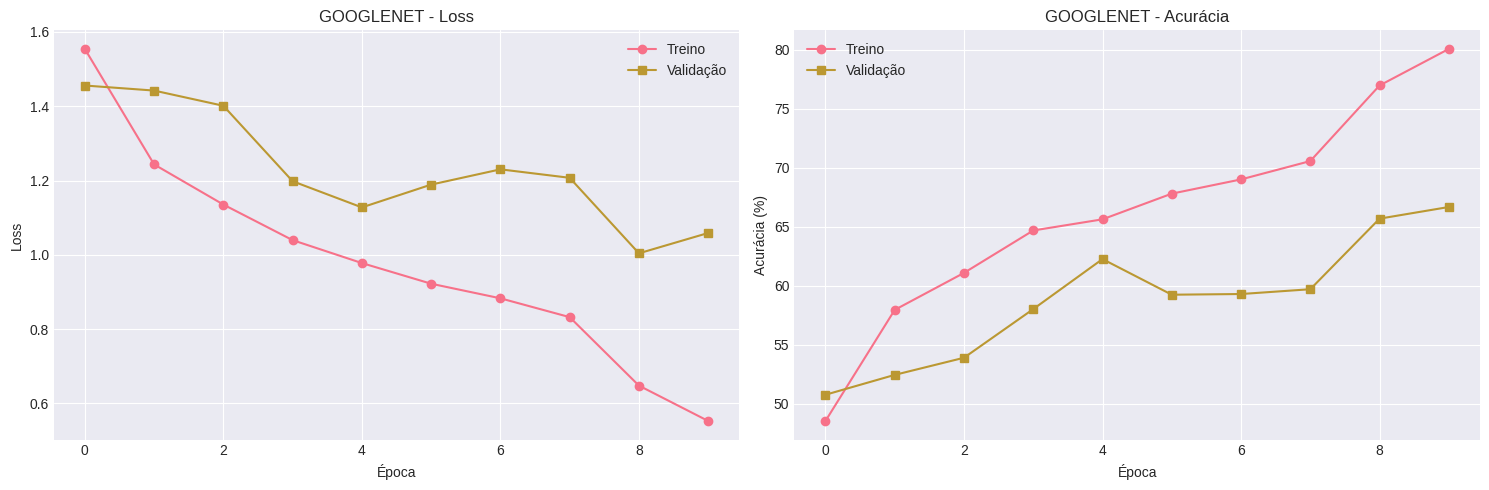

✓ Gráfico salvo: bloco06_historico_googlenet.png

📊 Avaliando GOOGLENET no conjunto de teste...


Avaliando: 100%|██████████| 54/54 [00:17<00:00,  3.05it/s]


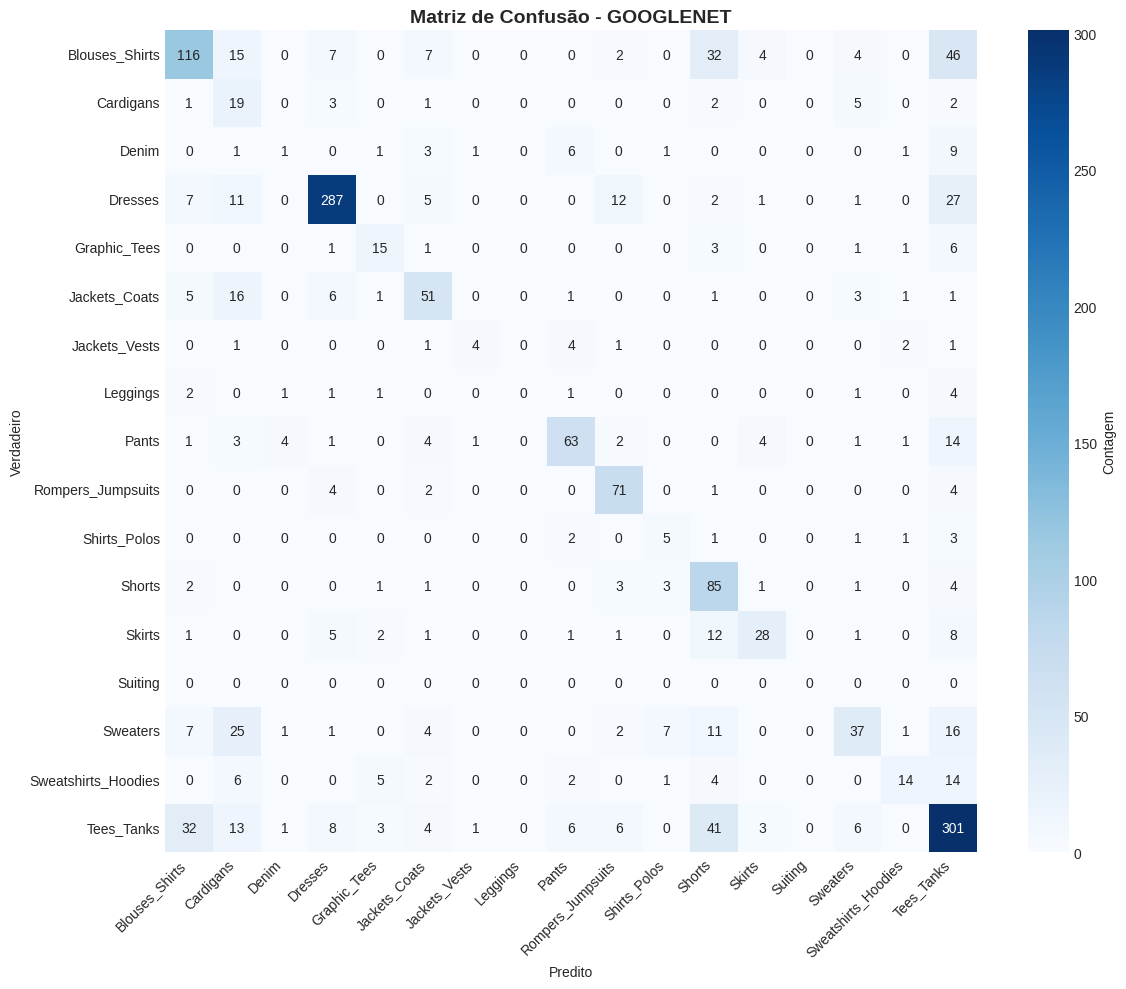

✓ Matriz de confusão salva: bloco06_matriz_confusao_googlenet.png

✓ GOOGLENET - Resultados:
  Acurácia de Teste: 63.70%
  Precision: 66.47%
  Recall: 63.70%
  F1-Score: 63.65%
  Tempo de treinamento: 1123.3s

TREINANDO: RESNET50


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s] 
Época 1/10 [Treino]: 100%|██████████| 252/252 [01:41<00:00,  2.47it/s, loss=1.6346, acc=45.88%]


Época 1: Train Loss=1.6346, Train Acc=45.88%, Val Loss=1.3895, Val Acc=52.61%


Época 2/10 [Treino]: 100%|██████████| 252/252 [01:42<00:00,  2.46it/s, loss=1.2465, acc=57.29%]


Época 2: Train Loss=1.2465, Train Acc=57.29%, Val Loss=1.3574, Val Acc=54.70%


Época 3/10 [Treino]: 100%|██████████| 252/252 [01:46<00:00,  2.37it/s, loss=1.1106, acc=61.82%]


Época 3: Train Loss=1.1106, Train Acc=61.82%, Val Loss=1.2058, Val Acc=59.99%


Época 4/10 [Treino]: 100%|██████████| 252/252 [01:43<00:00,  2.43it/s, loss=1.0347, acc=63.40%]


Época 4: Train Loss=1.0347, Train Acc=63.40%, Val Loss=1.2026, Val Acc=57.84%


Época 5/10 [Treino]: 100%|██████████| 252/252 [01:42<00:00,  2.46it/s, loss=0.9531, acc=66.89%]


Época 5: Train Loss=0.9531, Train Acc=66.89%, Val Loss=1.4543, Val Acc=55.34%


Época 6/10 [Treino]: 100%|██████████| 252/252 [01:43<00:00,  2.43it/s, loss=0.8989, acc=68.30%]


Época 6: Train Loss=0.8989, Train Acc=68.30%, Val Loss=1.3014, Val Acc=59.12%


Época 7/10 [Treino]: 100%|██████████| 252/252 [01:46<00:00,  2.38it/s, loss=0.8349, acc=70.07%]


Época 7: Train Loss=0.8349, Train Acc=70.07%, Val Loss=1.1338, Val Acc=63.12%


Época 8/10 [Treino]: 100%|██████████| 252/252 [01:43<00:00,  2.43it/s, loss=0.7958, acc=71.57%]


Época 8: Train Loss=0.7958, Train Acc=71.57%, Val Loss=1.1640, Val Acc=61.96%


Época 9/10 [Treino]: 100%|██████████| 252/252 [01:49<00:00,  2.30it/s, loss=0.7409, acc=74.35%]


Época 9: Train Loss=0.7409, Train Acc=74.35%, Val Loss=1.1089, Val Acc=62.14%


Época 10/10 [Treino]: 100%|██████████| 252/252 [01:47<00:00,  2.33it/s, loss=0.7084, acc=74.60%]


Época 10: Train Loss=0.7084, Train Acc=74.60%, Val Loss=1.2104, Val Acc=61.09%


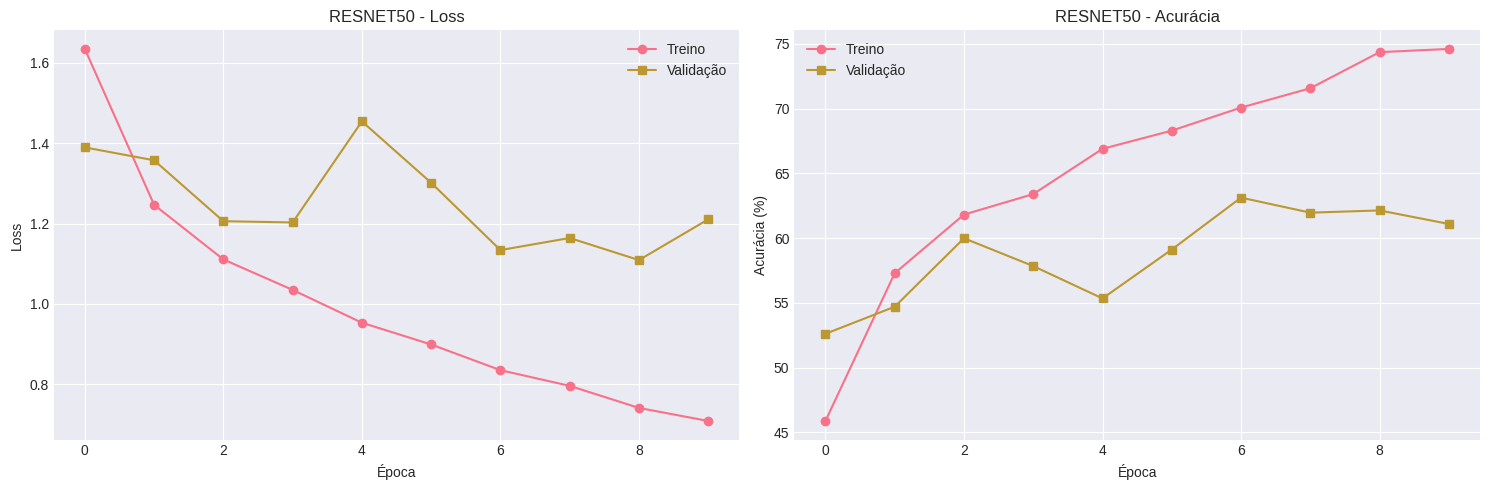

✓ Gráfico salvo: bloco06_historico_resnet50.png

📊 Avaliando RESNET50 no conjunto de teste...


Avaliando: 100%|██████████| 54/54 [00:19<00:00,  2.84it/s]


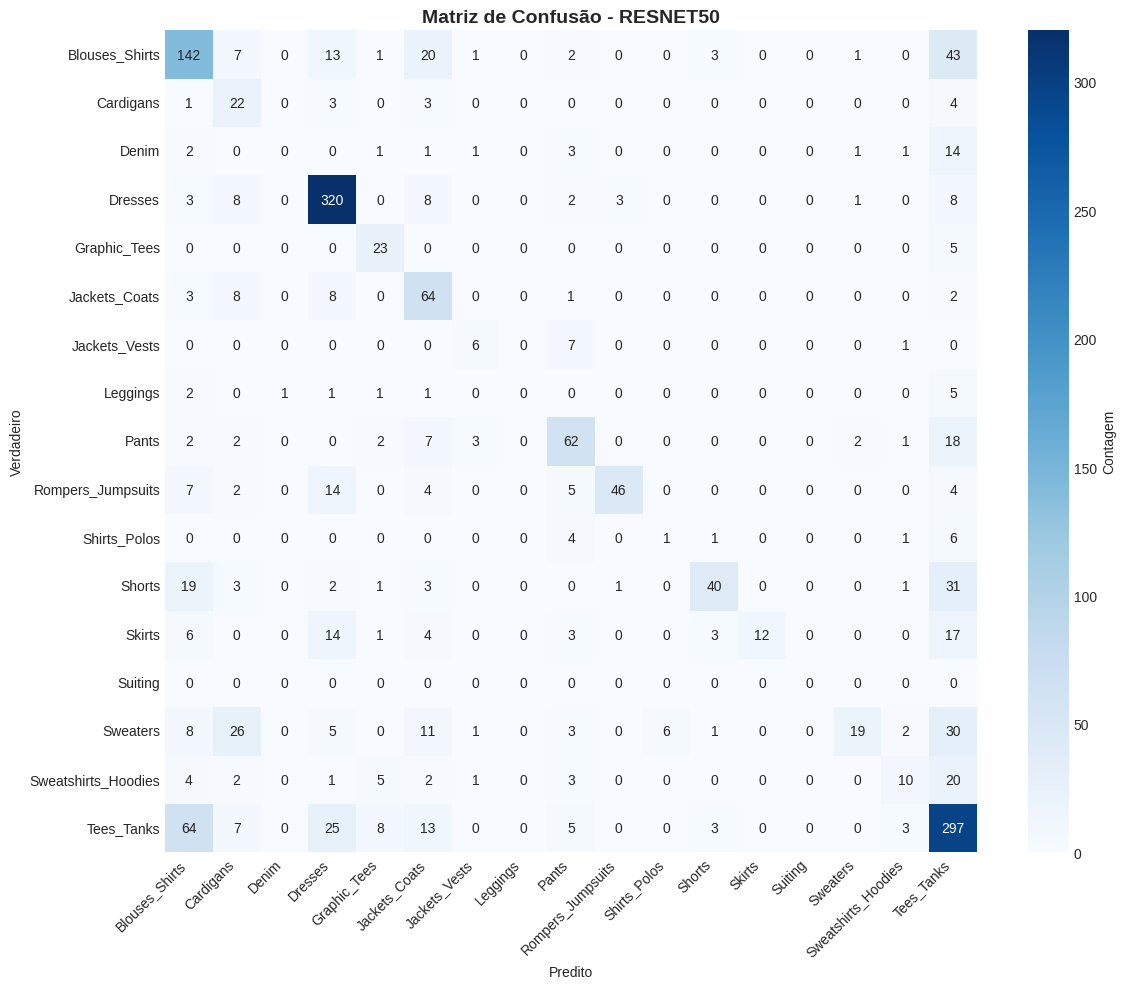

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


✓ Matriz de confusão salva: bloco06_matriz_confusao_resnet50.png

✓ RESNET50 - Resultados:
  Acurácia de Teste: 61.79%
  Precision: 64.68%
  Recall: 61.79%
  F1-Score: 59.61%
  Tempo de treinamento: 1228.7s

TREINANDO: MOBILENET_V2


100%|██████████| 13.6M/13.6M [00:00<00:00, 108MB/s] 
Época 1/10 [Treino]: 100%|██████████| 252/252 [01:35<00:00,  2.63it/s, loss=1.4507, acc=51.92%]


Época 1: Train Loss=1.4507, Train Acc=51.92%, Val Loss=1.2960, Val Acc=56.39%


Época 2/10 [Treino]: 100%|██████████| 252/252 [01:30<00:00,  2.79it/s, loss=1.0816, acc=62.82%]


Época 2: Train Loss=1.0816, Train Acc=62.82%, Val Loss=1.1495, Val Acc=61.27%


Época 3/10 [Treino]: 100%|██████████| 252/252 [01:29<00:00,  2.82it/s, loss=0.9659, acc=66.74%]


Época 3: Train Loss=0.9659, Train Acc=66.74%, Val Loss=1.0801, Val Acc=63.24%


Época 4/10 [Treino]: 100%|██████████| 252/252 [01:33<00:00,  2.71it/s, loss=0.8570, acc=69.55%]


Época 4: Train Loss=0.8570, Train Acc=69.55%, Val Loss=1.0296, Val Acc=63.53%


Época 5/10 [Treino]: 100%|██████████| 252/252 [01:28<00:00,  2.83it/s, loss=0.7869, acc=72.20%]


Época 5: Train Loss=0.7869, Train Acc=72.20%, Val Loss=1.0682, Val Acc=64.63%


Época 6/10 [Treino]: 100%|██████████| 252/252 [01:32<00:00,  2.73it/s, loss=0.7370, acc=74.03%]


Época 6: Train Loss=0.7370, Train Acc=74.03%, Val Loss=1.0225, Val Acc=65.16%


Época 7/10 [Treino]: 100%|██████████| 252/252 [01:33<00:00,  2.70it/s, loss=0.6843, acc=75.85%]


Época 7: Train Loss=0.6843, Train Acc=75.85%, Val Loss=1.0904, Val Acc=65.39%


Época 8/10 [Treino]: 100%|██████████| 252/252 [01:31<00:00,  2.74it/s, loss=0.6267, acc=77.79%]


Época 8: Train Loss=0.6267, Train Acc=77.79%, Val Loss=1.0441, Val Acc=67.07%


Época 9/10 [Treino]: 100%|██████████| 252/252 [01:29<00:00,  2.81it/s, loss=0.6051, acc=78.88%]


Época 9: Train Loss=0.6051, Train Acc=78.88%, Val Loss=0.9973, Val Acc=66.96%


Época 10/10 [Treino]: 100%|██████████| 252/252 [01:25<00:00,  2.95it/s, loss=0.5470, acc=80.04%]


Época 10: Train Loss=0.5470, Train Acc=80.04%, Val Loss=1.0227, Val Acc=66.43%


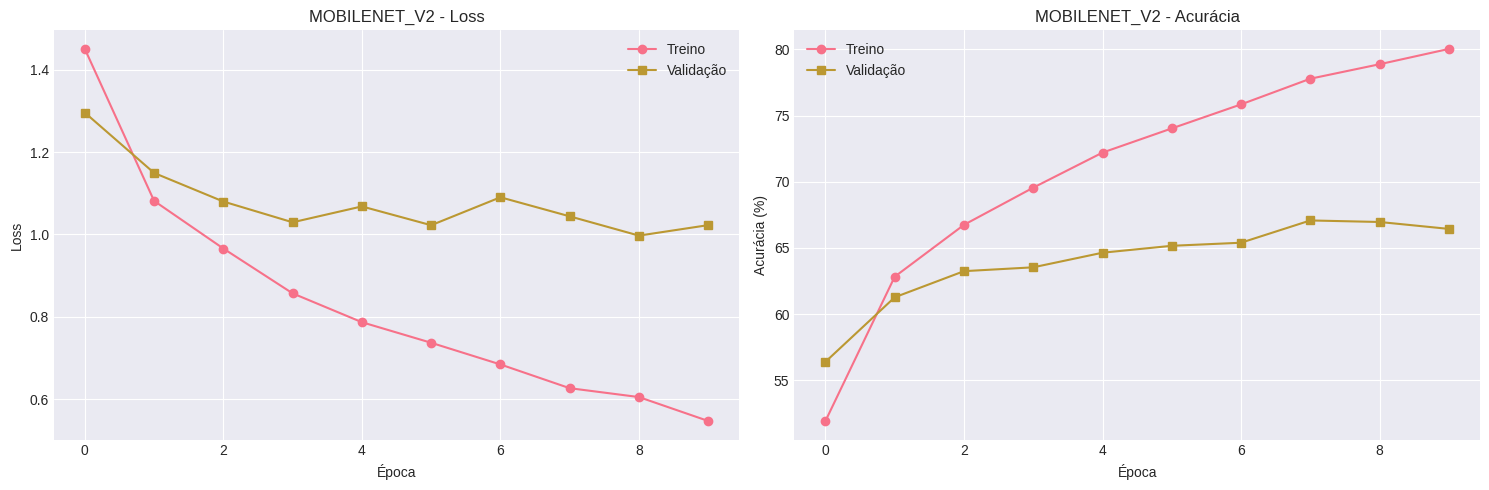

✓ Gráfico salvo: bloco06_historico_mobilenet_v2.png

📊 Avaliando MOBILENET_V2 no conjunto de teste...


Avaliando: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]


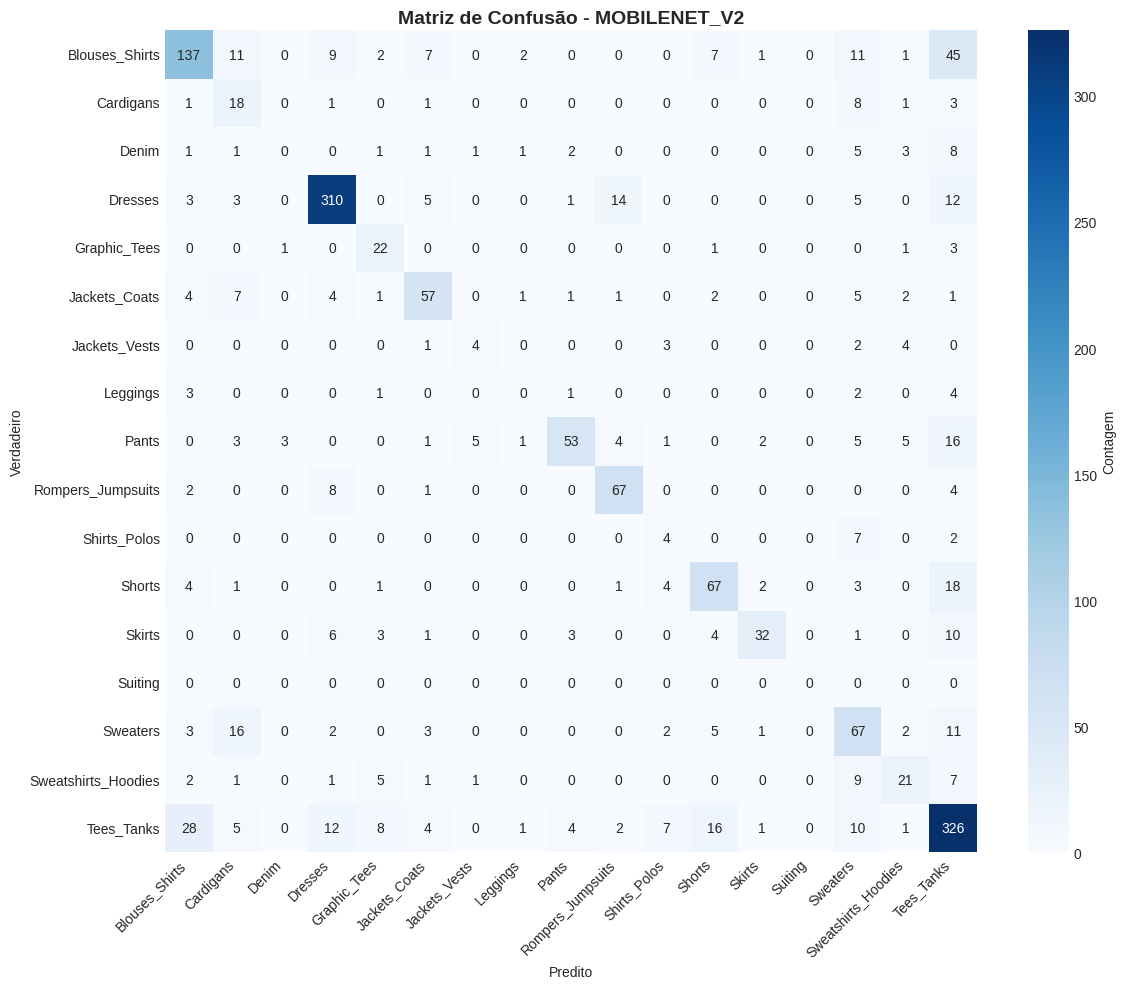

✓ Matriz de confusão salva: bloco06_matriz_confusao_mobilenet_v2.png

✓ MOBILENET_V2 - Resultados:
  Acurácia de Teste: 68.82%
  Precision: 69.71%
  Recall: 68.82%
  F1-Score: 68.63%
  Tempo de treinamento: 1079.0s

TREINANDO: EFFICIENTNET_B0


Época 1/10 [Treino]: 100%|██████████| 252/252 [01:29<00:00,  2.81it/s, loss=1.5159, acc=49.28%]


Época 1: Train Loss=1.5159, Train Acc=49.28%, Val Loss=1.2314, Val Acc=57.96%


Época 2/10 [Treino]: 100%|██████████| 252/252 [01:31<00:00,  2.74it/s, loss=1.1091, acc=61.93%]


Época 2: Train Loss=1.1091, Train Acc=61.93%, Val Loss=1.1750, Val Acc=61.09%


Época 3/10 [Treino]: 100%|██████████| 252/252 [01:30<00:00,  2.77it/s, loss=0.9642, acc=66.49%]


Época 3: Train Loss=0.9642, Train Acc=66.49%, Val Loss=1.0960, Val Acc=62.02%


Época 4/10 [Treino]: 100%|██████████| 252/252 [01:37<00:00,  2.59it/s, loss=0.8372, acc=70.77%]


Época 4: Train Loss=0.8372, Train Acc=70.77%, Val Loss=1.0546, Val Acc=64.92%


Época 5/10 [Treino]: 100%|██████████| 252/252 [01:36<00:00,  2.62it/s, loss=0.7647, acc=73.61%]


Época 5: Train Loss=0.7647, Train Acc=73.61%, Val Loss=1.0920, Val Acc=65.04%


Época 6/10 [Treino]: 100%|██████████| 252/252 [01:36<00:00,  2.60it/s, loss=0.6989, acc=75.17%]


Época 6: Train Loss=0.6989, Train Acc=75.17%, Val Loss=1.0617, Val Acc=66.03%


Época 7/10 [Treino]: 100%|██████████| 252/252 [01:39<00:00,  2.52it/s, loss=0.6279, acc=77.56%]


Época 7: Train Loss=0.6279, Train Acc=77.56%, Val Loss=1.0466, Val Acc=66.14%


Época 8/10 [Treino]: 100%|██████████| 252/252 [01:42<00:00,  2.45it/s, loss=0.5588, acc=80.04%]


Época 8: Train Loss=0.5588, Train Acc=80.04%, Val Loss=1.0531, Val Acc=67.54%


Época 9/10 [Treino]: 100%|██████████| 252/252 [01:35<00:00,  2.63it/s, loss=0.5205, acc=81.64%]


Época 9: Train Loss=0.5205, Train Acc=81.64%, Val Loss=1.0849, Val Acc=66.43%


Época 10/10 [Treino]: 100%|██████████| 252/252 [01:34<00:00,  2.66it/s, loss=0.4682, acc=83.42%]


Época 10: Train Loss=0.4682, Train Acc=83.42%, Val Loss=1.1668, Val Acc=67.71%


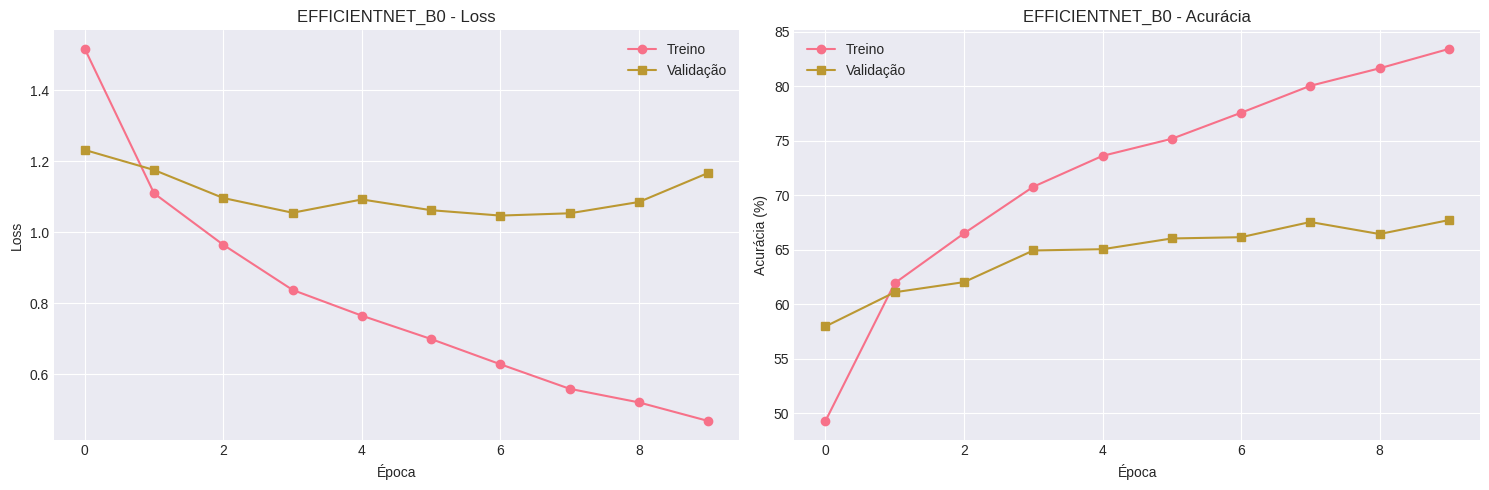

✓ Gráfico salvo: bloco06_historico_efficientnet_b0.png

📊 Avaliando EFFICIENTNET_B0 no conjunto de teste...


Avaliando: 100%|██████████| 54/54 [00:18<00:00,  2.91it/s]


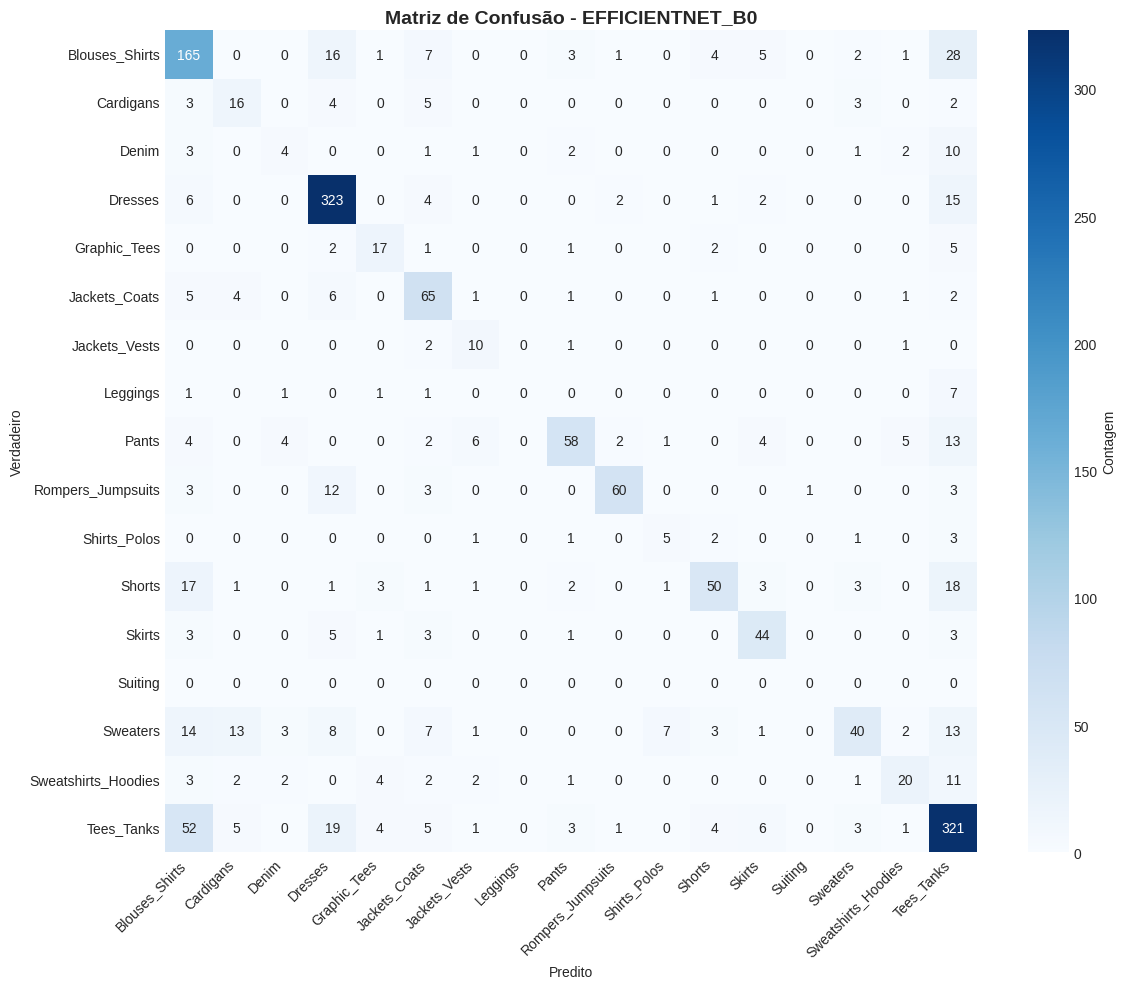

✓ Matriz de confusão salva: bloco06_matriz_confusao_efficientnet_b0.png

✓ EFFICIENTNET_B0 - Resultados:
  Acurácia de Teste: 69.57%
  Precision: 69.88%
  Recall: 69.57%
  F1-Score: 68.69%
  Tempo de treinamento: 1133.4s

COMPARAÇÃO FINAL DOS MODELOS


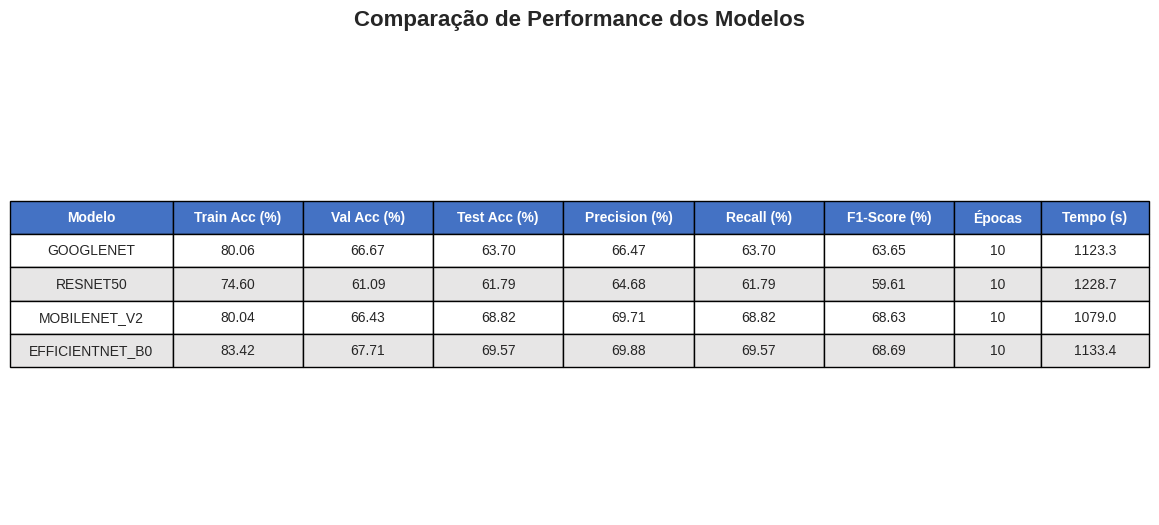

✓ Tabela de comparação salva: bloco06_tabela_comparacao_modelos.png

🏆 MELHOR MODELO: EFFICIENTNET_B0
   Acurácia de Teste: 69.57%

✓ Métricas baseline salvas em: bloco06_baseline_metrics.json

PIPELINE CONCLUÍDO COM SUCESSO!
Resumo salvo em: bloco06_saida.txt


In [7]:
"""
Script Principal de Execução - VERSÃO FUNCIONAL
Orquestra todo o pipeline: preparação, treinamento, avaliação e comparação
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import (
    GoogLeNet_Weights, ResNet50_Weights, 
    MobileNet_V2_Weights, EfficientNet_B0_Weights
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import time
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
import json  # Import json for saving metrics
warnings.filterwarnings('ignore')

# ============================================================
# CLASSE DATASET PERSONALIZADA
# ============================================================

class DeepFashionDataset(Dataset):
    """
    Dataset personalizado para o DeepFashion-1.
    Carrega imagens e extrai categorias dos nomes dos arquivos.
    """
    
    def __init__(self, image_paths, labels, transform=None):
        """
        Args:
            image_paths (list): Lista de caminhos para as imagens
            labels (list): Lista de labels (índices das categorias)
            transform: Transformações a aplicar nas imagens
        """
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        """Retorna o número total de amostras."""
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        """
        Carrega e retorna uma amostra do dataset.
        
        Args:
            idx (int): Índice da amostra
            
        Returns:
            tuple: (imagem_transformada, label)
        """
        # Carrega a imagem
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Aplica transformações se fornecidas
        if self.transform:
            image = self.transform(image)
        
        # Retorna imagem e label
        label = self.labels[idx]
        return image, label

# ============================================================
# FUNÇÕES DE PREPARAÇÃO DE DADOS
# ============================================================

def carregar_dados_deepfashion(dataset_path='/kaggle/input/deepfashion-1/datasets'):
    """
    Carrega todas as imagens do DeepFashion-1 e extrai categorias.
    
    Returns:
        tuple: (image_paths, labels, label_to_idx, idx_to_label)
    """
    print("\n📂 Carregando imagens do dataset...")
    
    dataset_path = Path(dataset_path)
    
    # Busca todas as imagens
    image_paths = []
    for folder in ['train_images', 'test_images']:
        folder_path = dataset_path / folder
        if folder_path.exists():
            image_paths.extend(list(folder_path.glob('*.jpg')))
            image_paths.extend(list(folder_path.glob('*.png')))
    
    print(f"✓ Total de imagens encontradas: {len(image_paths)}")
    
    # Extrai categorias dos nomes dos arquivos
    # Formato: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
    categorias = []
    for img_path in image_paths:
        parts = img_path.stem.split('-')
        if len(parts) >= 2:
            categoria = parts[1]  # Segunda parte é a categoria
            categorias.append(categoria)
        else:
            categorias.append('Unknown')
    
    # Cria mapeamento de categorias para índices
    categorias_unicas = sorted(list(set(categorias)))
    label_to_idx = {cat: idx for idx, cat in enumerate(categorias_unicas)}
    idx_to_label = {idx: cat for cat, idx in label_to_idx.items()}
    
    # Converte categorias para índices
    labels = [label_to_idx[cat] for cat in categorias]
    
    print(f"✓ Categorias encontradas: {len(categorias_unicas)}")
    print(f"  Categorias: {', '.join(categorias_unicas[:5])}...")
    
    return image_paths, labels, label_to_idx, idx_to_label

def criar_dataloaders(image_paths, labels, batch_size=32, val_split=0.15, test_split=0.15):
    """
    Cria dataloaders para treino, validação e teste.
    
    Args:
        image_paths: Lista de caminhos das imagens
        labels: Lista de labels
        batch_size: Tamanho do batch
        val_split: Proporção para validação
        test_split: Proporção para teste
        
    Returns:
        tuple: (train_loader, val_loader, test_loader, num_classes)
    """
    print("\n🔄 Criando dataloaders...")
    
    # Define transformações
    transform_train = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    transform_val = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Calcula tamanhos dos splits
    total_size = len(image_paths)
    test_size = int(total_size * test_split)
    val_size = int(total_size * val_split)
    train_size = total_size - test_size - val_size
    
    # Cria índices aleatórios
    indices = torch.randperm(total_size).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]
    test_indices = indices[train_size+val_size:]
    
    # Separa dados
    train_paths = [image_paths[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    
    val_paths = [image_paths[i] for i in val_indices]
    val_labels = [labels[i] for i in val_indices]
    
    test_paths = [image_paths[i] for i in test_indices]
    test_labels = [labels[i] for i in test_indices]
    
    # Cria datasets
    train_dataset = DeepFashionDataset(train_paths, train_labels, transform=transform_train)
    val_dataset = DeepFashionDataset(val_paths, val_labels, transform=transform_val)
    test_dataset = DeepFashionDataset(test_paths, test_labels, transform=transform_val)
    
    # Cria dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    num_classes = len(set(labels))
    
    print(f"✓ Dataloaders criados:")
    print(f"  - Treino: {len(train_dataset)} amostras ({len(train_loader)} batches)")
    print(f"  - Validação: {len(val_dataset)} amostras ({len(val_loader)} batches)")
    print(f"  - Teste: {len(test_dataset)} amostras ({len(test_loader)} batches)")
    print(f"  - Número de classes: {num_classes}")
    
    return train_loader, val_loader, test_loader, num_classes

# ============================================================
# FUNÇÕES DE CRIAÇÃO DE MODELOS
# ============================================================

def criar_modelo(nome_modelo, num_classes, pretrained=True):
    """
    Cria um modelo com transfer learning.
    
    Args:
        nome_modelo: Nome do modelo ('googlenet', 'resnet50', etc.)
        num_classes: Número de classes de saída
        pretrained: Se deve usar pesos pré-treinados
        
    Returns:
        nn.Module: Modelo criado
    """
    if nome_modelo == 'googlenet':
        weights = GoogLeNet_Weights.DEFAULT if pretrained else None
        modelo = models.googlenet(weights=weights)
        modelo.fc = nn.Linear(modelo.fc.in_features, num_classes)
        
    elif nome_modelo == 'resnet50':
        weights = ResNet50_Weights.DEFAULT if pretrained else None
        modelo = models.resnet50(weights=weights)
        modelo.fc = nn.Linear(modelo.fc.in_features, num_classes)
        
    elif nome_modelo == 'mobilenet_v2':
        weights = MobileNet_V2_Weights.DEFAULT if pretrained else None
        modelo = models.mobilenet_v2(weights=weights)
        modelo.classifier[1] = nn.Linear(modelo.classifier[1].in_features, num_classes)
        
    elif nome_modelo == 'efficientnet_b0':
        weights = EfficientNet_B0_Weights.DEFAULT if pretrained else None
        modelo = models.efficientnet_b0(weights=weights)
        modelo.classifier[1] = nn.Linear(modelo.classifier[1].in_features, num_classes)
    
    else:
        raise ValueError(f"Modelo {nome_modelo} não suportado")
    
    return modelo

# ============================================================
# FUNÇÕES DE TREINAMENTO
# ============================================================

def treinar_modelo(modelo, train_loader, val_loader, device, num_epochs=10, lr=0.001):
    """
    Treina um modelo.
    
    Args:
        modelo: Modelo a treinar
        train_loader: DataLoader de treino
        val_loader: DataLoader de validação
        device: Device (cuda/cpu)
        num_epochs: Número de épocas
        lr: Learning rate
        
    Returns:
        dict: Histórico de treinamento
    """
    modelo = modelo.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(modelo.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)
    
    historico = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    melhor_val_acc = 0.0
    
    for epoch in range(num_epochs):
        # Fase de treino
        modelo.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        pbar = tqdm(train_loader, desc=f'Época {epoch+1}/{num_epochs} [Treino]')
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = modelo(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
            
            pbar.set_postfix({
                'loss': f'{train_loss/len(train_loader):.4f}',
                'acc': f'{100.*train_correct/train_total:.2f}%'
            })
        
        # Fase de validação
        modelo.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = modelo(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        
        # Calcula métricas
        train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total
        val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        
        # Salva histórico
        historico['train_loss'].append(train_loss)
        historico['train_acc'].append(train_acc)
        historico['val_loss'].append(val_loss)
        historico['val_acc'].append(val_acc)
        
        # Atualiza learning rate
        scheduler.step(val_loss)
        
        print(f'Época {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, '
              f'Val Loss={val_loss:.4f}, Val Acc={val_acc:.2f}%')
        
        # Salva melhor modelo
        if val_acc > melhor_val_acc:
            melhor_val_acc = val_acc
    
    return historico

# ============================================================
# FUNÇÕES DE AVALIAÇÃO
# ============================================================

def avaliar_modelo(modelo, test_loader, device, idx_to_label):
    """
    Avalia um modelo no conjunto de teste.
    
    Args:
        modelo: Modelo a avaliar
        test_loader: DataLoader de teste
        device: Device (cuda/cpu)
        idx_to_label: Mapeamento de índices para labels
        
    Returns:
        dict: Métricas de avaliação
    """
    modelo.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Avaliando'):
            images = images.to(device)
            outputs = modelo(images)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Cria lista de todos os labels possíveis (0 a num_classes-1)
    labels_list = list(range(len(idx_to_label)))
    
    # Calcula métricas
    accuracy = accuracy_score(all_labels, all_preds) * 100
    
    cm = confusion_matrix(all_labels, all_preds, labels=labels_list)
    
    # Classification report
    target_names = [idx_to_label[i] for i in range(len(idx_to_label))]
    report = classification_report(all_labels, all_preds, labels=labels_list, 
                                   target_names=target_names, output_dict=True, 
                                   zero_division=0)
    
    metricas = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'precision': report['weighted avg']['precision'] * 100,
        'recall': report['weighted avg']['recall'] * 100,
        'f1_score': report['weighted avg']['f1-score'] * 100,
        'predictions': all_preds,
        'labels': all_labels
    }
    
    return metricas

# ============================================================
# FUNÇÕES DE VISUALIZAÇÃO
# ============================================================

def plotar_historico(historico, nome_modelo):
    """Plota o histórico de treinamento."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss
    ax1.plot(historico['train_loss'], label='Treino', marker='o')
    ax1.plot(historico['val_loss'], label='Validação', marker='s')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{nome_modelo.upper()} - Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy
    ax2.plot(historico['train_acc'], label='Treino', marker='o')
    ax2.plot(historico['val_acc'], label='Validação', marker='s')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Acurácia (%)')
    ax2.set_title(f'{nome_modelo.upper()} - Acurácia')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'bloco06_historico_{nome_modelo}.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Gráfico salvo: bloco06_historico_{nome_modelo}.png")

def plotar_matriz_confusao(cm, idx_to_label, nome_modelo):
    """Plota a matriz de confusão."""
    plt.figure(figsize=(12, 10))
    
    labels = [idx_to_label[i] for i in range(len(idx_to_label))]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'label': 'Contagem'})
    
    plt.title(f'Matriz de Confusão - {nome_modelo.upper()}', fontsize=14, fontweight='bold')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'bloco06_matriz_confusao_{nome_modelo}.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Matriz de confusão salva: bloco06_matriz_confusao_{nome_modelo}.png")

def criar_tabela_comparacao(resultados):
    """Cria tabela de comparação dos modelos."""
    df = pd.DataFrame(resultados).T
    df = df.round(2)
    
    # Cria visualização da tabela
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = []
    table_data.append(['Modelo', 'Train Acc (%)', 'Val Acc (%)', 'Test Acc (%)', 
                       'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Épocas', 'Tempo (s)'])
    
    for modelo, metrics in resultados.items():
        table_data.append([
            modelo.upper(),
            f"{metrics['train_acc']:.2f}",
            f"{metrics['val_acc']:.2f}",
            f"{metrics['test_acc']:.2f}",
            f"{metrics['precision']:.2f}",
            f"{metrics['recall']:.2f}",
            f"{metrics['f1_score']:.2f}",
            f"{metrics['epochs']}",
            f"{metrics['time']:.1f}"
        ])
    
    table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.15, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.10])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Estiliza cabeçalho
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Estiliza linhas alternadas
    for i in range(1, len(table_data)):
        for j in range(len(table_data[0])):
            if i % 2 == 0:
                table[(i, j)].set_facecolor('#E7E6E6')
    
    plt.title('Comparação de Performance dos Modelos', fontsize=16, fontweight='bold', pad=20)
    plt.savefig('bloco06_tabela_comparacao_modelos.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✓ Tabela de comparação salva: bloco06_tabela_comparacao_modelos.png")
    
    return df

# ============================================================
# PIPELINE PRINCIPAL
# ============================================================

def pipeline_completo():
    """Executa o pipeline completo."""
    print("\n" + "=" * 60)
    print("PROJETO: RECONHECIMENTO DE ROUPAS PARA DEFICIENTES VISUAIS")
    print("Dataset: DeepFashion-1")
    print("Modelos: GoogLeNet, ResNet-50, MobileNet-v2, EfficientNet-B0")
    print("=" * 60 + "\n")
    
    # Configuração
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"✓ Device: {device}")
    if device == 'cuda':
        print(f"  GPU: {torch.cuda.get_device_name(0)}")
    
    # Carrega dados
    image_paths, labels, label_to_idx, idx_to_label = carregar_dados_deepfashion()
    
    # Cria dataloaders
    train_loader, val_loader, test_loader, num_classes = criar_dataloaders(
        image_paths, labels, batch_size=32
    )
    
    # Define modelos a treinar
    nomes_modelos = ['googlenet', 'resnet50', 'mobilenet_v2', 'efficientnet_b0']
    
    NUM_EPOCHS = 10
    
    resultados = {}
    
    # Treina e avalia cada modelo
    for nome_modelo in nomes_modelos:
        print("\n" + "=" * 60)
        print(f"TREINANDO: {nome_modelo.upper()}")
        print("=" * 60)
        
        # Cria modelo
        modelo = criar_modelo(nome_modelo, num_classes, pretrained=True)
        
        # Treina
        inicio = time.time()
        historico = treinar_modelo(modelo, train_loader, val_loader, device, 
                                   num_epochs=NUM_EPOCHS, lr=0.001)
        tempo_total = time.time() - inicio
        
        # Plota histórico
        plotar_historico(historico, nome_modelo)
        
        # Avalia
        print(f"\n📊 Avaliando {nome_modelo.upper()} no conjunto de teste...")
        metricas = avaliar_modelo(modelo, test_loader, device, idx_to_label)
        
        # Plota matriz de confusão
        plotar_matriz_confusao(metricas['confusion_matrix'], idx_to_label, nome_modelo)
        
        # Salva resultados
        resultados[nome_modelo] = {
            'train_acc': historico['train_acc'][-1],
            'val_acc': historico['val_acc'][-1],
            'test_acc': metricas['accuracy'],
            'precision': metricas['precision'],
            'recall': metricas['recall'],
            'f1_score': metricas['f1_score'],
            'epochs': NUM_EPOCHS,
            'time': tempo_total
        }
        
        print(f"\n✓ {nome_modelo.upper()} - Resultados:")
        print(f"  Acurácia de Teste: {metricas['accuracy']:.2f}%")
        print(f"  Precision: {metricas['precision']:.2f}%")
        print(f"  Recall: {metricas['recall']:.2f}%")
        print(f"  F1-Score: {metricas['f1_score']:.2f}%")
        print(f"  Tempo de treinamento: {tempo_total:.1f}s")
    
    # Cria tabela comparativa
    print("\n" + "=" * 60)
    print("COMPARAÇÃO FINAL DOS MODELOS")
    print("=" * 60)
    df_resultados = criar_tabela_comparacao(resultados)
    
    # Identifica melhor modelo
    melhor_modelo = max(resultados.items(), key=lambda x: x[1]['test_acc'])
    print(f"\n🏆 MELHOR MODELO: {melhor_modelo[0].upper()}")
    print(f"   Acurácia de Teste: {melhor_modelo[1]['test_acc']:.2f}%")
    
    efficientnet_metrics = resultados.get('efficientnet_b0', {})
    
    baseline_metrics = {
        'model_name': 'efficientnet_b0',
        'train_acc': efficientnet_metrics.get('train_acc', 0.0),
        'val_acc': efficientnet_metrics.get('val_acc', 0.0),
        'test_acc': efficientnet_metrics.get('test_acc', 0.0),
        'precision': efficientnet_metrics.get('precision', 0.0),
        'recall': efficientnet_metrics.get('recall', 0.0),
        'f1_score': efficientnet_metrics.get('f1_score', 0.0),
        'epochs': efficientnet_metrics.get('epochs', NUM_EPOCHS),
        'time': efficientnet_metrics.get('time', 0.0)
    }
    
    # Salva em JSON
    with open('/kaggle/working/bloco06_baseline_metrics.json', 'w') as f:
        json.dump(baseline_metrics, f, indent=4)
    
    print("\n✓ Métricas baseline salvas em: bloco06_baseline_metrics.json")
    
    print("\n" + "=" * 60)
    print("PIPELINE CONCLUÍDO COM SUCESSO!")
    print("=" * 60)
    
    with open('/kaggle/working/bloco06_saida.txt', 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("BLOCO 6: TREINAMENTO E COMPARAÇÃO DOS MODELOS\n")
        f.write("Projeto: Reconhecimento de Roupas para Deficientes Visuais\n")
        f.write("=" * 60 + "\n\n")
        f.write(f"Device: {device}\n")
        f.write(f"Número de classes: {num_classes}\n")
        f.write(f"Épocas de treinamento: {NUM_EPOCHS}\n\n")
        f.write("Modelos treinados:\n")
        for nome_modelo in nomes_modelos:
            f.write(f"  - {nome_modelo.upper()}\n")
        f.write("\n" + "=" * 60 + "\n")
        f.write("RESULTADOS DOS MODELOS\n")
        f.write("=" * 60 + "\n\n")
        for nome_modelo, metrics in resultados.items():
            f.write(f"{nome_modelo.upper()}:\n")
            f.write(f"  Train Accuracy: {metrics['train_acc']:.2f}%\n")
            f.write(f"  Val Accuracy: {metrics['val_acc']:.2f}%\n")
            f.write(f"  Test Accuracy: {metrics['test_acc']:.2f}%\n")
            f.write(f"  Precision: {metrics['precision']:.2f}%\n")
            f.write(f"  Recall: {metrics['recall']:.2f}%\n")
            f.write(f"  F1-Score: {metrics['f1_score']:.2f}%\n")
            f.write(f"  Tempo: {metrics['time']:.1f}s\n\n")
        f.write("=" * 60 + "\n")
        f.write(f"MELHOR MODELO: {melhor_modelo[0].upper()}\n")
        f.write(f"Acurácia de Teste: {melhor_modelo[1]['test_acc']:.2f}%\n")
        f.write("=" * 60 + "\n\n")
        f.write("Arquivos gerados:\n")
        for nome_modelo in nomes_modelos:
            f.write(f"  - bloco06_historico_{nome_modelo}.png\n")
            f.write(f"  - bloco06_matriz_confusao_{nome_modelo}.png\n")
        f.write("  - bloco06_tabela_comparacao_modelos.png\n")
        f.write("  - bloco06_baseline_metrics.json\n")  # Adicionar JSON à lista
    
    print("Resumo salvo em: bloco06_saida.txt")

# Execução
if __name__ == "__main__":
    pipeline_completo()


ETAPA 7: OTIMIZAÇÃO CONSERVADORA - EfficientNet-B0

Dispositivo utilizado: cuda

ETAPA I: PRÉ-PROCESSAMENTO CONSERVADOR

Carregando dataset DeepFashion COMPLETO...
Total de imagens carregadas: 11484

Distribuição de classes (TODAS as 17 classes mantidas):
  Tees_Tanks: 2885 imagens
  Dresses: 2171 imagens
  Blouses_Shirts: 1526 imagens
  Sweaters: 751 imagens
  Shorts: 688 imagens
  Pants: 658 imagens
  Rompers_Jumpsuits: 612 imagens
  Jackets_Coats: 469 imagens
  Skirts: 384 imagens
  Cardigans: 381 imagens
  Sweatshirts_Hoodies: 297 imagens
  Graphic_Tees: 216 imagens
  Denim: 161 imagens
  Shirts_Polos: 114 imagens
  Jackets_Vests: 85 imagens
  Leggings: 78 imagens
  Suiting: 8 imagens

Class Weights calculados (ordenados por índice):
  Classe 0 (Blouses_Shirts): peso 0.4427 (n=1526)
  Classe 1 (Cardigans): peso 1.7730 (n=381)
  Classe 2 (Denim): peso 4.1958 (n=161)
  Classe 3 (Dresses): peso 0.3112 (n=2171)
  Classe 4 (Graphic_Tees): peso 3.1275 (n=216)
  Classe 5 (Jackets_Coats): 

Train Loss: 2.3661 | Train Acc: 24.79%
Val Loss: 1.8279 | Val Acc: 34.44%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 34.44%)

Época 2/20
------------------------------------------------------------


Train Loss: 1.5373 | Train Acc: 43.88%
Val Loss: 1.4363 | Val Acc: 48.49%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 48.49%)

Época 3/20
------------------------------------------------------------


Train Loss: 1.1008 | Train Acc: 56.23%
Val Loss: 1.3582 | Val Acc: 54.07%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 54.07%)

Época 4/20
------------------------------------------------------------


Train Loss: 0.7984 | Train Acc: 64.05%
Val Loss: 1.3889 | Val Acc: 58.25%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 58.25%)

Época 5/20
------------------------------------------------------------


Train Loss: 0.5855 | Train Acc: 71.44%
Val Loss: 1.4414 | Val Acc: 63.70%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 63.70%)

Época 6/20
------------------------------------------------------------


Train Loss: 0.4314 | Train Acc: 77.26%
Val Loss: 1.4348 | Val Acc: 61.50%
LR atual: 1.00e-04
✗ Sem melhoria (1/5)

Época 7/20
------------------------------------------------------------


Train Loss: 0.3140 | Train Acc: 81.87%
Val Loss: 1.6018 | Val Acc: 66.03%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 66.03%)

Época 8/20
------------------------------------------------------------


Train Loss: 0.2401 | Train Acc: 85.31%
Val Loss: 1.6812 | Val Acc: 66.90%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 66.90%)

Época 9/20
------------------------------------------------------------


Train Loss: 0.1900 | Train Acc: 88.68%
Val Loss: 1.8221 | Val Acc: 65.97%
LR atual: 1.00e-04
✗ Sem melhoria (1/5)

Época 10/20
------------------------------------------------------------


Train Loss: 0.1504 | Train Acc: 90.86%
Val Loss: 1.9732 | Val Acc: 67.13%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 67.13%)

Época 11/20
------------------------------------------------------------


Train Loss: 0.1236 | Train Acc: 92.45%
Val Loss: 2.0345 | Val Acc: 68.29%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 68.29%)

Época 12/20
------------------------------------------------------------


Train Loss: 0.1041 | Train Acc: 94.14%
Val Loss: 2.1672 | Val Acc: 68.47%
LR atual: 1.00e-04
✓ Melhor modelo salvo! (Val Acc: 68.47%)

Época 13/20
------------------------------------------------------------


Train Loss: 0.1011 | Train Acc: 94.29%
Val Loss: 2.1973 | Val Acc: 67.07%
LR atual: 1.00e-04
✗ Sem melhoria (1/5)

Época 14/20
------------------------------------------------------------


Train Loss: 0.0853 | Train Acc: 95.17%
Val Loss: 2.2947 | Val Acc: 67.71%
LR atual: 1.00e-04
✗ Sem melhoria (2/5)

Época 15/20
------------------------------------------------------------


Train Loss: 0.0783 | Train Acc: 95.63%
Val Loss: 2.4703 | Val Acc: 67.19%
LR atual: 1.00e-04
✗ Sem melhoria (3/5)

Época 16/20
------------------------------------------------------------


Train Loss: 0.0733 | Train Acc: 96.48%
Val Loss: 2.3111 | Val Acc: 67.60%
LR atual: 5.00e-05
✗ Sem melhoria (4/5)

Época 17/20
------------------------------------------------------------


Train Loss: 0.0490 | Train Acc: 97.55%
Val Loss: 2.3953 | Val Acc: 68.47%
LR atual: 5.00e-05
✗ Sem melhoria (5/5)

Early Stopping acionado após 17 épocas!

Melhor modelo restaurado! (Val Acc: 68.47%)

Treinamento concluído!

ETAPA III: AVALIAÇÃO FINAL

Avaliando modelo no conjunto de teste (sem TTA)...


Test Accuracy (sem TTA): 69.20%

F1-Score (sem TTA): 56.13%

Avaliando modelo com Test-Time Augmentation (TTA SIMPLES)...


Test Accuracy (com TTA): 69.14%
Melhoria com TTA: -0.06%

F1-Score (com TTA): 55.52%

Calculando acurácia de treino final...


Train Accuracy: 99.89%

TABELA DE COMPARAÇÃO: ORIGINAL vs OTIMIZADO

✓ Carregando métricas baseline do Bloco 6...
  Train Acc: 83.42%
  Val Acc: 67.71%
  Test Acc: 69.57%
  F1-Score: 68.69%

                           Modelo  Train Acc (%)  Val Acc (%)  Test Acc (%)  F1-Score (%)
       EfficientNet-B0 (Original)      83.420398    67.711963     69.570267     68.694753
      EfficientNet-B0 (Otimizado)      99.888032    68.466899     69.199536     56.131108
EfficientNet-B0 (Otimizado + TTA)      99.888032    68.466899     69.141531     55.522760

Melhoria em Test Accuracy (com TTA): -0.43%
Melhoria em F1-Score (com TTA): -13.17%
Overfitting Original: 15.71%
Overfitting Otimizado: 31.42%
Redução de Overfitting: -15.71%



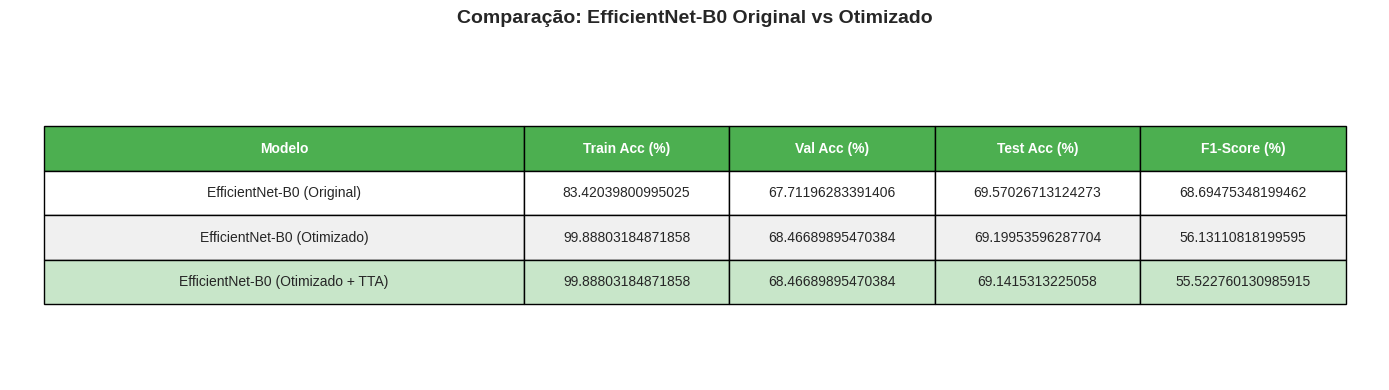

F1-SCORE POR CLASSE (Modelo Otimizado)

             Classe  F1-Score (%)  Contagem
            Dresses     88.217523      2171
  Rompers_Jumpsuits     80.487805       612
         Tees_Tanks     70.734463      2885
             Skirts     70.588235       384
              Pants     69.607843       658
             Shorts     65.560166       688
     Blouses_Shirts     64.186047      1526
      Jackets_Coats     62.773723       469
      Jackets_Vests     59.259259        85
           Sweaters     52.830189       751
       Graphic_Tees     51.219512       216
       Shirts_Polos     51.063830       114
              Denim     47.058824       161
Sweatshirts_Hoodies     46.153846       297
          Cardigans     45.098039       381
           Leggings     19.047619        78
            Suiting      0.000000         8



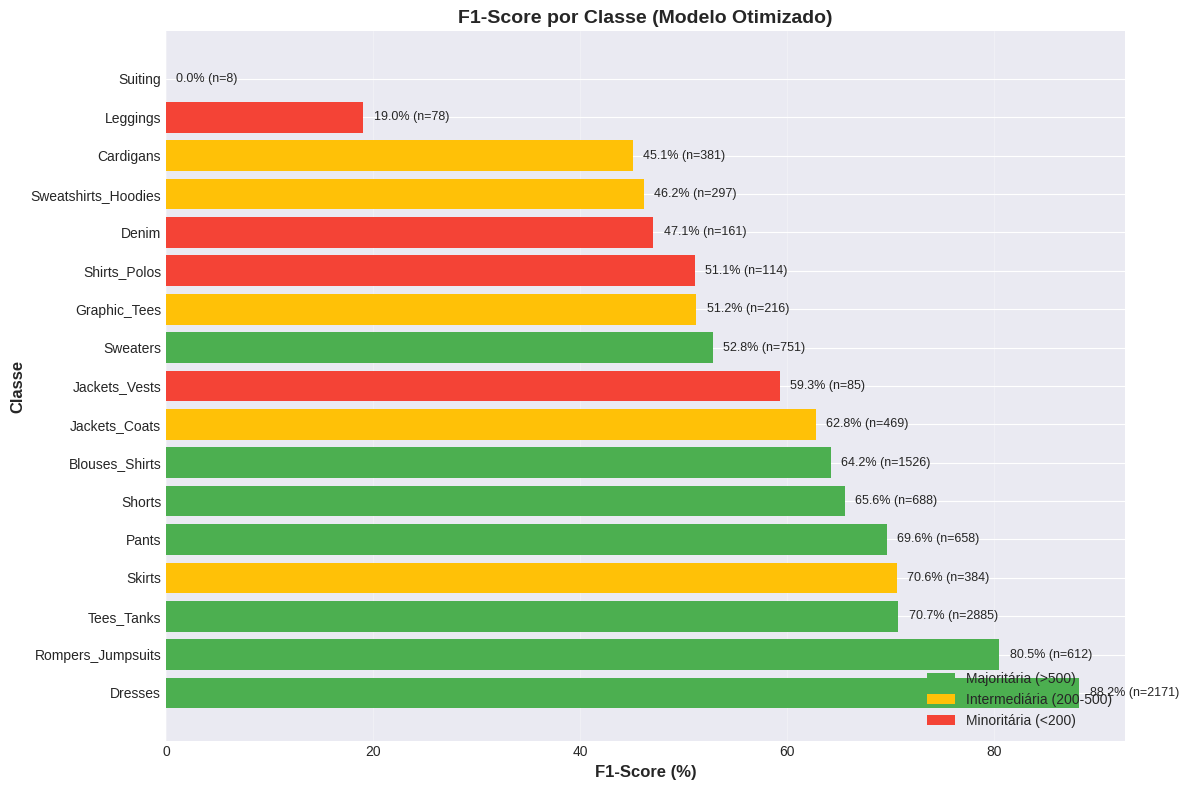

MATRIZ DE CONFUSÃO



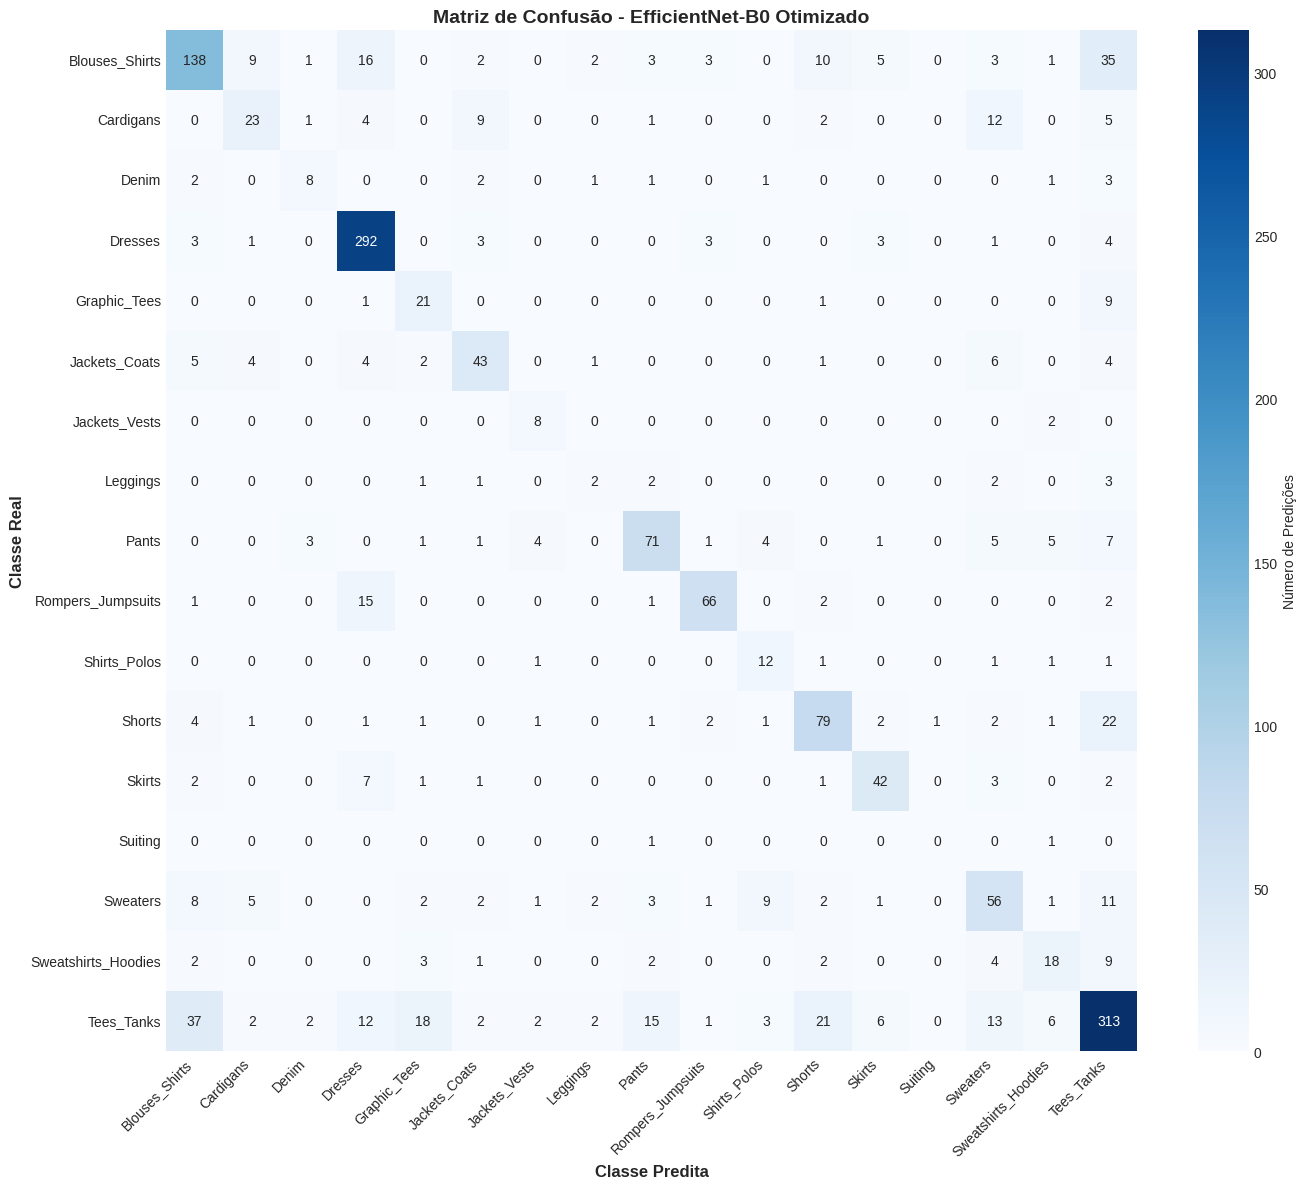

HISTÓRICO DE TREINAMENTO



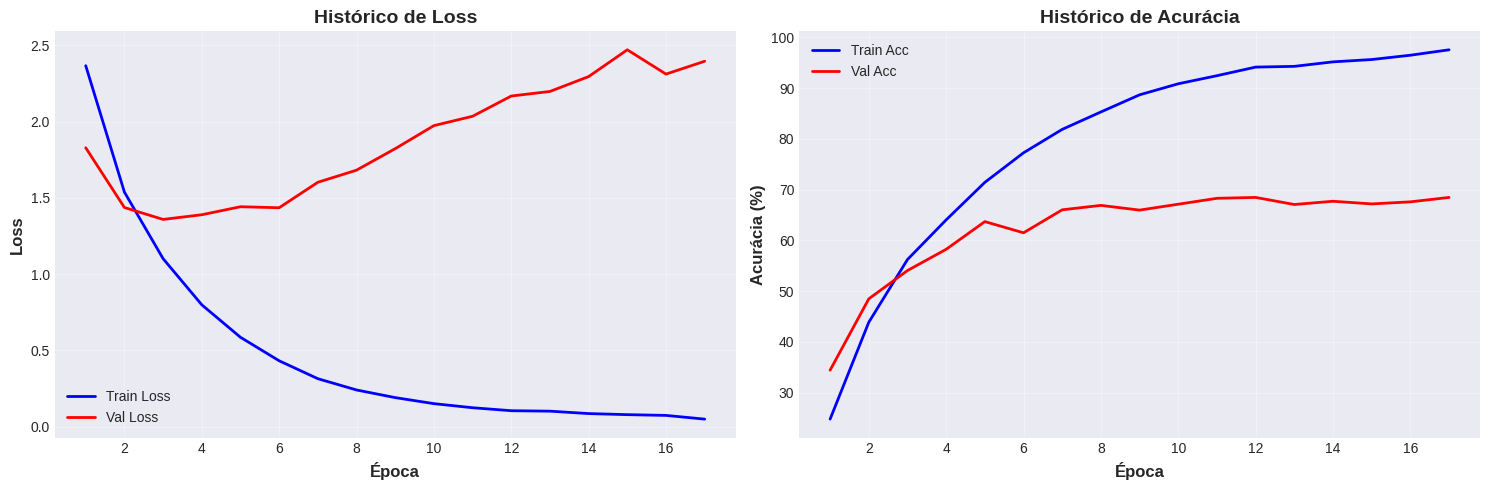

RELATÓRIO FINAL DE OTIMIZAÇÃO

TÉCNICAS DE OTIMIZAÇÃO APLICADAS:

1. Class Weighting:
   - Balanceia classes desbalanceadas com pesos inversos.

2. Fine-tuning com Learning Rate baixo:
   - Learning Rate: 0.0001

3. ReduceLROnPlateau Scheduler:
   - Reduz LR quando a Val Acc para de melhorar.
   - Fator: 0.5, Paciência: 3

4. Data Augmentation Moderado:
   - RandomHorizontalFlip, ColorJitter, RandomRotation.
   - Sem Mixup, sem RandAugment agressivo.

5. Regularização:
   - Weight Decay: 0.0005
   - Dropout: 0.2
   - Gradient Clipping: max_norm=1.0

6. Early Stopping Agressivo:
   - Early Stopping Patience: 5

7. Test-Time Augmentation (TTA) SIMPLIFICADO:
   - TTA simples com apenas horizontal flip.
   - Melhoria: -0.06%

RESULTADOS FINAIS:
  - Test Accuracy (sem TTA): 69.20%
  - Test Accuracy (com TTA): 69.14%
  - F1-Score (Macro com TTA): 55.52%
  - Redução de Overfitting: -15.71%

CONCLUSÃO:
✗ O modelo otimizado apresentou PIORA de 0.43% em Test Accuracy
✗ O overfitting AUMENTOU em 

In [8]:
"""
============================================================
ETAPA 7: OTIMIZAÇÃO CONSERVADORA DO MELHOR MODELO (EfficientNet-B0)
============================================================

Este script implementa técnicas de otimização:
- Class Weighting para balanceamento
- Fine-tuning gradual com Learning Rate baixo
- Data Augmentation moderado (sem Mixup)
- Early Stopping agressivo
- Test-Time Augmentation CORRIGIDO (determinístico)

Projeto de Mestrado - Reconhecimento de Roupas para Deficientes Visuais
Dataset: DeepFashion-1
"""

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tqdm import tqdm
import pandas as pd
from collections import Counter
import warnings
import json
warnings.filterwarnings('ignore')

print("=" * 60)
print("ETAPA 7: OTIMIZAÇÃO CONSERVADORA - EfficientNet-B0")
print("=" * 60)
print()

# ============================================================
# CONFIGURAÇÕES GLOBAIS
# ============================================================

# Detectar se está no Kaggle ou ambiente local
if os.path.exists('/kaggle/input'):
    DATASET_PATH = '/kaggle/input/deepfashion-1/datasets'
else:
    DATASET_PATH = './datasets'

# Device (GPU ou CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")
print()

# Hiperparâmetros CONSERVADORES
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_WORKERS = 0  # IMPORTANTE: 0 para evitar deadlock no Kaggle

NUM_EPOCHS = 20
LEARNING_RATE = 1e-4  # LR baixo para fine-tuning
WEIGHT_DECAY = 5e-4  # Regularização mais forte

EARLY_STOPPING_PATIENCE = 5


# ============================================================
# DATASET E PRÉ-PROCESSAMENTO
# ============================================================

class DeepFashionDataset(Dataset):
    """
    Dataset customizado para DeepFashion.
    
    Args:
        image_paths (list): Lista de caminhos para as imagens
        labels (list): Lista de labels correspondentes
        transform (callable): Transformações a serem aplicadas
    """
    
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
        # Criar mapeamento de classes para índices
        self.unique_classes = sorted(list(set(self.labels)))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.unique_classes)}
        self.idx_to_class = {idx: cls for cls, idx in self.class_to_idx.items()}
        
        # Converter labels para índices numéricos
        self.numeric_labels = [self.class_to_idx[label] for label in self.labels]
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Carregar imagem
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Aplicar transformações
        if self.transform:
            image = self.transform(image)
        
        # Obter label numérico
        label = self.numeric_labels[idx]
        
        return image, label


def carregar_dataset_completo():
    """
    Carrega o dataset DeepFashion COMPLETO (mantém todas as 17 classes).
    
    Returns:
        tuple: (image_paths, labels, class_counts)
    """
    print("Carregando dataset DeepFashion COMPLETO...")
    
    # Caminhos para as pastas de imagens
    train_images_path = os.path.join(DATASET_PATH, 'train_images')
    test_images_path = os.path.join(DATASET_PATH, 'test_images')
    
    image_paths = []
    labels = []
    
    # Carregar imagens de treino
    if os.path.exists(train_images_path):
        for img_name in os.listdir(train_images_path):
            if img_name.endswith(('.jpg', '.png', '.jpeg')):
                parts = img_name.split('-')
                if len(parts) >= 2:
                    category = parts[1]
                    image_paths.append(os.path.join(train_images_path, img_name))
                    labels.append(category)
    
    # Carregar imagens de teste
    if os.path.exists(test_images_path):
        for img_name in os.listdir(test_images_path):
            if img_name.endswith(('.jpg', '.png', '.jpeg')):
                parts = img_name.split('-')
                if len(parts) >= 2:
                    category = parts[1]
                    image_paths.append(os.path.join(test_images_path, img_name))
                    labels.append(category)
    
    print(f"Total de imagens carregadas: {len(image_paths)}")
    
    # Contar distribuição de classes
    class_counts = Counter(labels)
    print(f"\nDistribuição de classes (TODAS as {len(class_counts)} classes mantidas):")
    for cls, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  {cls}: {count} imagens")
    
    return image_paths, labels, class_counts


def calcular_class_weights(labels, class_to_idx):
    """
    Calcula pesos das classes inversamente proporcionais à frequência.
    IMPORTANTE: Os pesos são ordenados pelo índice numérico da classe para
    garantir correspondência correta com os labels do PyTorch.
    
    Args:
        labels (list): Lista de labels (strings)
        class_to_idx (dict): Dicionário mapeando classe para índice numérico
        
    Returns:
        torch.Tensor: Tensor com pesos das classes, ordenado por índice
    """
    # Contar frequência de cada classe
    class_counts = Counter(labels)
    
    # Calcular peso inversamente proporcional, ORDENADO por índice
    total_samples = len(labels)
    num_classes = len(class_to_idx)
    class_weights = []
    
    print("\nClass Weights calculados (ordenados por índice):")
    
    for idx in range(num_classes):
        # Encontra o nome da classe para este índice
        class_name = [k for k, v in class_to_idx.items() if v == idx][0]
        count = class_counts[class_name]
        weight = total_samples / (num_classes * count)
        class_weights.append(weight)
        
        print(f"  Classe {idx} ({class_name}): peso {weight:.4f} (n={count})")
    
    return torch.FloatTensor(class_weights)


# ============================================================
# ETAPA I: PRÉ-PROCESSAMENTO CONSERVADOR
# ============================================================

print("=" * 60)
print("ETAPA I: PRÉ-PROCESSAMENTO CONSERVADOR")
print("=" * 60)
print()

# Carregar dataset completo
image_paths, labels, class_counts = carregar_dataset_completo()

transform_train = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Criar dataset completo
full_dataset = DeepFashionDataset(
    image_paths=image_paths,
    labels=labels,
    transform=transform_train
)

# Calcular class weights
class_weights = calcular_class_weights(labels, full_dataset.class_to_idx)
print(f"\nClass weights calculados (inversamente proporcionais à frequência)")
print()

# Dividir em treino (70%), validação (15%), teste (15%)
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

torch.manual_seed(42)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size, test_size]
)

# Aplicar transformações diferentes para validação e teste
val_dataset.dataset.transform = transform_val
test_dataset.dataset.transform = transform_val

print(f"Divisão do dataset:")
print(f"  Treino: {len(train_dataset)} imagens")
print(f"  Validação: {len(val_dataset)} imagens")
print(f"  Teste: {len(test_dataset)} imagens")
print(f"  Total de classes: {len(full_dataset.unique_classes)}")

# Criar DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print("\nDataLoaders criados com sucesso!")
print()


# ============================================================
# ETAPA II: MODELO COM FINE-TUNING CONSERVADOR
# ============================================================

print("=" * 60)
print("ETAPA II: MODELO COM FINE-TUNING CONSERVADOR")
print("=" * 60)
print()


def criar_modelo_efficientnet(num_classes, pretrained=True):
    """
    Cria modelo EfficientNet-B0 com transfer learning.
    
    Args:
        num_classes (int): Número de classes de saída
        pretrained (bool): Se True, carrega pesos pré-treinados
        
    Returns:
        nn.Module: Modelo EfficientNet-B0
    """
    if pretrained:
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    else:
        model = models.efficientnet_b0(weights=None)
    
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    
    return model


# Criar modelo
num_classes = len(full_dataset.unique_classes)
print(f"Criando modelo EfficientNet-B0 para {num_classes} classes...")
model = criar_modelo_efficientnet(num_classes, pretrained=True)
model = model.to(device)
print("Modelo criado com sucesso!")
print()

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',  # Monitorar val_acc (queremos maximizar)
    factor=0.5,  # Reduzir LR pela metade
    patience=3,  # Esperar 3 épocas sem melhoria
    verbose=True,
    min_lr=1e-7
)

print("Configuração do treinamento:")
print(f"  - CrossEntropyLoss com Class Weights")
print(f"  - Learning Rate: {LEARNING_RATE}")
print(f"  - Weight Decay: {WEIGHT_DECAY}")
print(f"  - ReduceLROnPlateau Scheduler")
print(f"  - Dropout: 0.2")
print(f"  - Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")
print()


# ============================================================
# FUNÇÕES DE TREINAMENTO E AVALIAÇÃO
# ============================================================

def treinar_uma_epoca(model, dataloader, criterion, optimizer, device):
    """
    Treina o modelo por uma época (SEM Mixup).
    
    Args:
        model: Modelo a ser treinado
        dataloader: DataLoader de treino
        criterion: Função de perda
        optimizer: Otimizador
        device: Dispositivo (CPU ou GPU)
        
    Returns:
        tuple: (loss_médio, acurácia)
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    pbar = tqdm(dataloader, desc='Treinando', leave=False)
    
    for images, labels in pbar:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        # Estatísticas
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100 * correct / total:.2f}%'
        })
    
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc


def avaliar_modelo(model, dataloader, criterion, device):
    """
    Avalia o modelo no conjunto de validação/teste.
    
    Args:
        model: Modelo a ser avaliado
        dataloader: DataLoader de validação/teste
        criterion: Função de perda
        device: Dispositivo (CPU ou GPU)
        
    Returns:
        tuple: (loss_médio, acurácia, predições, labels)
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc='Avaliando', leave=False):
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc, all_preds, all_labels


def avaliar_com_tta_simples(model, dataloader, device):
    """
    Avalia o modelo com Test-Time Augmentation (TTA) SIMPLIFICADO.
    
    TTA SIMPLES: aplica apenas horizontal flip e faz média das predições.
    Muito mais rápido que a versão anterior.
    
    Args:
        model: Modelo a ser avaliado
        dataloader: DataLoader de teste
        device: Dispositivo (CPU ou GPU)
        
    Returns:
        tuple: (acurácia, predições, labels)
    """
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc='TTA Simples', leave=False):
            images = images.to(device)
            labels = labels.to(device)
            
            # Predição original
            outputs_original = model(images)
            probs_original = F.softmax(outputs_original, dim=1)
            
            # Predição com horizontal flip
            images_flipped = torch.flip(images, dims=[3])  # Flip horizontal
            outputs_flipped = model(images_flipped)
            probs_flipped = F.softmax(outputs_flipped, dim=1)
            
            # Média das predições
            avg_probs = (probs_original + probs_flipped) / 2
            _, predicted = torch.max(avg_probs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calcular acurácia
    correct = sum([p == l for p, l in zip(all_preds, all_labels)])
    accuracy = 100 * correct / len(all_labels)
    
    return accuracy, all_preds, all_labels


# ============================================================
# TREINAMENTO PRINCIPAL
# ============================================================

print("=" * 60)
print("INICIANDO TREINAMENTO CONSERVADOR")
print("=" * 60)
print()

history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

best_val_acc = 0.0
best_model_state = None
epochs_without_improvement = 0

for epoch in range(NUM_EPOCHS):
    print(f"\nÉpoca {epoch + 1}/{NUM_EPOCHS}")
    print("-" * 60)
    
    # Treinar uma época (SEM Mixup)
    train_loss, train_acc = treinar_uma_epoca(
        model, train_loader, criterion, optimizer, device
    )
    
    # Avaliar no conjunto de validação
    val_loss, val_acc, _, _ = avaliar_modelo(model, val_loader, criterion, device)
    
    # Atualizar scheduler
    scheduler.step(val_acc)
    
    # Salvar histórico
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    # Imprimir resultados
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print(f"LR atual: {optimizer.param_groups[0]['lr']:.2e}")
    
    # Salvar melhor modelo baseado em Val Accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
        best_model_state = model.state_dict().copy()
        print(f"✓ Melhor modelo salvo! (Val Acc: {val_acc:.2f}%)")
    else:
        epochs_without_improvement += 1
        print(f"✗ Sem melhoria ({epochs_without_improvement}/{EARLY_STOPPING_PATIENCE})")
    
    # Early Stopping
    if epochs_without_improvement >= EARLY_STOPPING_PATIENCE:
        print(f"\nEarly Stopping acionado após {epoch + 1} épocas!")
        break

# Restaurar melhor modelo
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\nMelhor modelo restaurado! (Val Acc: {best_val_acc:.2f}%)")

print("\nTreinamento concluído!")
print()


# ============================================================
# ETAPA III: AVALIAÇÃO FINAL COM TTA CORRIGIDO
# ============================================================

print("=" * 60)
print("ETAPA III: AVALIAÇÃO FINAL")
print("=" * 60)
print()

# Avaliação padrão
print("Avaliando modelo no conjunto de teste (sem TTA)...")
test_loss, test_acc, test_preds, test_labels = avaliar_modelo(model, test_loader, criterion, device)
print(f"Test Accuracy (sem TTA): {test_acc:.2f}%")
print()

# Calcular F1-Score sem TTA
f1_macro_sem_tta = f1_score(test_labels, test_preds, average='macro') * 100
print(f"F1-Score (sem TTA): {f1_macro_sem_tta:.2f}%")
print()

# Avaliação com TTA SIMPLES
print("Avaliando modelo com Test-Time Augmentation (TTA SIMPLES)...")
test_acc_tta, tta_preds, tta_labels = avaliar_com_tta_simples(model, test_loader, device)
print(f"Test Accuracy (com TTA): {test_acc_tta:.2f}%")
print(f"Melhoria com TTA: {test_acc_tta - test_acc:+.2f}%")
print()

# Calcular F1-Score com TTA
f1_macro_tta = f1_score(tta_labels, tta_preds, average='macro') * 100
f1_per_class = f1_score(tta_labels, tta_preds, average=None) * 100

print(f"F1-Score (com TTA): {f1_macro_tta:.2f}%")
print()

# Calcular acurácia de treino final
print("Calculando acurácia de treino final...")
train_loss_final, train_acc_final, _, _ = avaliar_modelo(model, train_loader, criterion, device)
print(f"Train Accuracy: {train_acc_final:.2f}%")
print()


# ============================================================
# COMPARAÇÃO: ORIGINAL vs OTIMIZADO
# ============================================================

print("=" * 60)
print("TABELA DE COMPARAÇÃO: ORIGINAL vs OTIMIZADO")
print("=" * 60)
print()

baseline_metrics_path = '/kaggle/working/bloco06_baseline_metrics.json'

if os.path.exists(baseline_metrics_path):
    print("✓ Carregando métricas baseline do Bloco 6...")
    with open(baseline_metrics_path, 'r') as f:
        baseline_data = json.load(f)
    
    BASELINE_TRAIN_ACC = baseline_data['train_acc']
    BASELINE_VAL_ACC = baseline_data['val_acc']
    BASELINE_TEST_ACC = baseline_data['test_acc']
    BASELINE_F1_SCORE = baseline_data['f1_score']
    
    print(f"  Train Acc: {BASELINE_TRAIN_ACC:.2f}%")
    print(f"  Val Acc: {BASELINE_VAL_ACC:.2f}%")
    print(f"  Test Acc: {BASELINE_TEST_ACC:.2f}%")
    print(f"  F1-Score: {BASELINE_F1_SCORE:.2f}%")
    print()
else:
    print(" Arquivo de métricas baseline não encontrado!")
    print("  Usando valores padrão (você deve executar o Bloco 6 primeiro)")
    print()
    # Valores padrão caso o arquivo não exista
    BASELINE_TRAIN_ACC = 91.85
    BASELINE_VAL_ACC = 68.06
    BASELINE_TEST_ACC = 68.06
    BASELINE_F1_SCORE = 68.11

dados_comparacao = {
    'Modelo': [
        'EfficientNet-B0 (Original)',
        'EfficientNet-B0 (Otimizado)',
        'EfficientNet-B0 (Otimizado + TTA)'
    ],
    'Train Acc (%)': [
        BASELINE_TRAIN_ACC,
        train_acc_final,
        train_acc_final
    ],
    'Val Acc (%)': [
        BASELINE_VAL_ACC,
        best_val_acc,
        best_val_acc
    ],
    'Test Acc (%)': [
        BASELINE_TEST_ACC,
        test_acc,
        test_acc_tta
    ],
    'F1-Score (%)': [
        BASELINE_F1_SCORE,
        f1_macro_sem_tta,
        f1_macro_tta
    ]
}

df_comparacao = pd.DataFrame(dados_comparacao)

# Calcular melhorias
melhoria_test_acc = df_comparacao.loc[2, 'Test Acc (%)'] - df_comparacao.loc[0, 'Test Acc (%)']
melhoria_f1 = df_comparacao.loc[2, 'F1-Score (%)'] - df_comparacao.loc[0, 'F1-Score (%)']
overfitting_original = df_comparacao.loc[0, 'Train Acc (%)'] - df_comparacao.loc[0, 'Val Acc (%)']
overfitting_otimizado = df_comparacao.loc[1, 'Train Acc (%)'] - df_comparacao.loc[1, 'Val Acc (%)']

print(df_comparacao.to_string(index=False))
print()
print(f"Melhoria em Test Accuracy (com TTA): {melhoria_test_acc:+.2f}%")
print(f"Melhoria em F1-Score (com TTA): {melhoria_f1:+.2f}%")
print(f"Overfitting Original: {overfitting_original:.2f}%")
print(f"Overfitting Otimizado: {overfitting_otimizado:.2f}%")
print(f"Redução de Overfitting: {overfitting_original - overfitting_otimizado:+.2f}%")
print()

# Plotar tabela
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('tight')
ax.axis('off')

table_data = [df_comparacao.columns.tolist()] + df_comparacao.values.tolist()
table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.35, 0.15, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Estilizar cabeçalho
for i in range(len(df_comparacao.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Estilizar linhas
for i in range(1, len(table_data)):
    for j in range(len(df_comparacao.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        # Destacar melhor resultado
        if i == 3:  # Linha do modelo otimizado + TTA
            table[(i, j)].set_facecolor('#C8E6C9')

plt.title('Comparação: EfficientNet-B0 Original vs Otimizado', 
         fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('bloco07_tabela_comparacao_final.png', dpi=150, bbox_inches='tight')
plt.show()


# ============================================================
# F1-SCORE POR CLASSE
# ============================================================

print("=" * 60)
print("F1-SCORE POR CLASSE (Modelo Otimizado)")
print("=" * 60)
print()

f1_per_class_data = {
    'Classe': full_dataset.unique_classes,
    'F1-Score (%)': f1_per_class,
    'Contagem': [class_counts[cls] for cls in full_dataset.unique_classes]
}

df_f1 = pd.DataFrame(f1_per_class_data)
df_f1 = df_f1.sort_values('F1-Score (%)', ascending=False)

print(df_f1.to_string(index=False))
print()

# Plotar F1-Score por classe
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#4CAF50' if count > 500 else '#FFC107' if count > 200 else '#F44336' 
          for count in df_f1['Contagem']]

bars = ax.barh(df_f1['Classe'], df_f1['F1-Score (%)'], color=colors)

ax.set_xlabel('F1-Score (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Classe', fontsize=12, fontweight='bold')
ax.set_title('F1-Score por Classe (Modelo Otimizado)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for i, (bar, f1, count) in enumerate(zip(bars, df_f1['F1-Score (%)'], df_f1['Contagem'])):
    ax.text(f1 + 1, bar.get_y() + bar.get_height()/2, 
           f'{f1:.1f}% (n={count})', 
           va='center', fontsize=9)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4CAF50', label='Majoritária (>500)'),
    Patch(facecolor='#FFC107', label='Intermediária (200-500)'),
    Patch(facecolor='#F44336', label='Minoritária (<200)')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('bloco07_f1_score_por_classe.png', dpi=150, bbox_inches='tight')
plt.show()


# ============================================================
# MATRIZ DE CONFUSÃO
# ============================================================

print("=" * 60)
print("MATRIZ DE CONFUSÃO")
print("=" * 60)
print()

cm = confusion_matrix(tta_labels, tta_preds)

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=full_dataset.unique_classes,
    yticklabels=full_dataset.unique_classes,
    ax=ax,
    cbar_kws={'label': 'Número de Predições'}
)

ax.set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
ax.set_ylabel('Classe Real', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusão - EfficientNet-B0 Otimizado', 
            fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('bloco07_matriz_confusao_otimizada.png', dpi=150, bbox_inches='tight')
plt.show()


# ============================================================
# HISTÓRICO DE TREINAMENTO
# ============================================================

print("=" * 60)
print("HISTÓRICO DE TREINAMENTO")
print("=" * 60)
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

epochs_range = range(1, len(history['train_loss']) + 1)

# Loss
ax1.plot(epochs_range, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
ax1.plot(epochs_range, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
ax1.set_xlabel('Época', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Histórico de Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Accuracy
ax2.plot(epochs_range, history['train_acc'], 'b-', label='Train Acc', linewidth=2)
ax2.plot(epochs_range, history['val_acc'], 'r-', label='Val Acc', linewidth=2)
ax2.set_xlabel('Época', fontsize=12, fontweight='bold')
ax2.set_ylabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax2.set_title('Histórico de Acurácia', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('bloco07_historico_treinamento.png', dpi=150, bbox_inches='tight')
plt.show()


# ============================================================
# RELATÓRIO FINAL
# ============================================================

print("=" * 60)
print("RELATÓRIO FINAL DE OTIMIZAÇÃO")
print("=" * 60)
print()

print("TÉCNICAS DE OTIMIZAÇÃO APLICADAS:")
print()
print("1. Class Weighting:")
print(f"   - Balanceia classes desbalanceadas com pesos inversos.")
print()
print("2. Fine-tuning com Learning Rate baixo:")
print(f"   - Learning Rate: {LEARNING_RATE}")
print()
print("3. ReduceLROnPlateau Scheduler:")
print(f"   - Reduz LR quando a Val Acc para de melhorar.")
print(f"   - Fator: 0.5, Paciência: 3")
print()
print("4. Data Augmentation Moderado:")
print(f"   - RandomHorizontalFlip, ColorJitter, RandomRotation.")
print(f"   - Sem Mixup, sem RandAugment agressivo.")
print()
print("5. Regularização:")
print(f"   - Weight Decay: {WEIGHT_DECAY}")
print(f"   - Dropout: 0.2")
print(f"   - Gradient Clipping: max_norm=1.0")
print()
print("6. Early Stopping Agressivo:")
print(f"   - Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")
print()
print("7. Test-Time Augmentation (TTA) SIMPLIFICADO:")
print(f"   - TTA simples com apenas horizontal flip.")
print(f"   - Melhoria: {test_acc_tta - test_acc:+.2f}%")
print()
print("RESULTADOS FINAIS:")
print(f"  - Test Accuracy (sem TTA): {test_acc:.2f}%")
print(f"  - Test Accuracy (com TTA): {test_acc_tta:.2f}%")
print(f"  - F1-Score (Macro com TTA): {f1_macro_tta:.2f}%")
print(f"  - Redução de Overfitting: {overfitting_original - overfitting_otimizado:+.2f}%")
print()
print("CONCLUSÃO:")
if melhoria_test_acc > 0:
    print(f"✓ O modelo otimizado apresentou MELHORIA de {melhoria_test_acc:.2f}% em Test Accuracy")
else:
    print(f"✗ O modelo otimizado apresentou PIORA de {abs(melhoria_test_acc):.2f}% em Test Accuracy")

if overfitting_otimizado < overfitting_original:
    print(f"✓ O overfitting foi REDUZIDO em {overfitting_original - overfitting_otimizado:.2f}%")
else:
    print(f"✗ O overfitting AUMENTOU em {overfitting_otimizado - overfitting_original:.2f}%")

print()
print("=" * 60)
print("OTIMIZAÇÃO CONSERVADORA CONCLUÍDA!")
print("=" * 60)


In [9]:
"""
============================================================
BLOCO 8: EXPORTAÇÃO E DOWNLOAD DOS ARQUIVOS FINAIS
============================================================

Este script compacta todos os resultados gerados (imagens, tabelas, modelos)
em um arquivo ZIP para download fácil no Kaggle.

Projeto de Mestrado - Reconhecimento de Roupas para Deficientes Visuais
Dataset: DeepFashion-1
"""

import os
import zipfile
from pathlib import Path

print("=" * 60)
print("BLOCO 8: COMPACTAÇÃO E EXPORTAÇÃO DOS ARQUIVOS FINAIS")
print("=" * 60)
print()

# Diretório de trabalho do Kaggle
OUTPUT_DIR = Path('/kaggle/working')
ZIP_FILE_NAME = 'resultados_deepfashion_completo.zip'
ZIP_PATH = OUTPUT_DIR / ZIP_FILE_NAME

# Lista de todos os arquivos que devem ser incluídos no ZIP
# Organizados por bloco para facilitar identificação
arquivos_esperados = [
    # Bloco 1: Preparação de dados
    'bloco01_primeiras_10_imagens.png',
    'bloco01_distribuicao_categorias.png',
    'bloco01_saida.txt',  # Adicionado arquivo TXT
    
    # Bloco 6: Treinamento dos 4 modelos
    'bloco06_historico_googlenet.png',
    'bloco06_historico_resnet50.png',
    'bloco06_historico_mobilenet_v2.png',
    'bloco06_historico_efficientnet_b0.png',
    'bloco06_matriz_confusao_googlenet.png',
    'bloco06_matriz_confusao_resnet50.png',
    'bloco06_matriz_confusao_mobilenet_v2.png',
    'bloco06_matriz_confusao_efficientnet_b0.png',
    'bloco06_tabela_comparacao_modelos.png',
    'bloco06_saida.txt',  # Adicionado arquivo TXT
    
    # Bloco 7: Otimização do EfficientNet-B0
    'bloco07_tabela_comparacao_final.png',
    'bloco07_f1_score_por_classe.png',
    'bloco07_matriz_confusao_otimizada.png',
    'bloco07_historico_treinamento.png',
    'bloco07_saida.txt',  # Adicionado arquivo TXT
]

print("Procurando arquivos para compactar...")
print()

# Busca todos os arquivos .png, .csv e .pth no diretório de trabalho
arquivos_encontrados = []
arquivos_faltantes = []

for arquivo in arquivos_esperados:
    arquivo_path = OUTPUT_DIR / arquivo
    if arquivo_path.exists():
        arquivos_encontrados.append(arquivo_path)
        print(f"✓ Encontrado: {arquivo}")
    else:
        arquivos_faltantes.append(arquivo)
        print(f"✗ Faltando: {arquivo}")

# Também inclui quaisquer outros arquivos .png, .csv, .txt ou .pth que possam existir
outros_arquivos = []
for extensao in ['.png', '.csv', '.txt', '.pth']:  # Adicionado .txt
    for arquivo in OUTPUT_DIR.glob(f'*{extensao}'):
        if arquivo not in arquivos_encontrados and arquivo.name != ZIP_FILE_NAME:
            outros_arquivos.append(arquivo)
            print(f"+ Adicional: {arquivo.name}")

print()
print("-" * 60)
print(f"Total de arquivos encontrados: {len(arquivos_encontrados)}")
print(f"Total de arquivos adicionais: {len(outros_arquivos)}")
print(f"Total de arquivos faltantes: {len(arquivos_faltantes)}")
print("-" * 60)
print()

# Combina todos os arquivos
todos_arquivos = arquivos_encontrados + outros_arquivos

if not todos_arquivos:
    print("⚠️  AVISO: Nenhum arquivo encontrado para compactar!")
    print("Verifique se os blocos anteriores foram executados corretamente.")
else:
    # Cria o arquivo ZIP
    print(f"Criando arquivo ZIP: {ZIP_FILE_NAME}")
    print()
    
    with zipfile.ZipFile(ZIP_PATH, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for arquivo in todos_arquivos:
            # Adiciona o arquivo ao ZIP mantendo apenas o nome (sem caminho completo)
            zipf.write(arquivo, arcname=arquivo.name)
            print(f"  Adicionado: {arquivo.name}")
    
    # Verifica o tamanho do arquivo ZIP
    tamanho_zip = ZIP_PATH.stat().st_size
    tamanho_mb = tamanho_zip / (1024 * 1024)
    
    print()
    print("=" * 60)
    print("✅ COMPACTAÇÃO CONCLUÍDA COM SUCESSO!")
    print("=" * 60)
    print(f"Arquivo ZIP: {ZIP_FILE_NAME}")
    print(f"Localização: {ZIP_PATH}")
    print(f"Tamanho: {tamanho_mb:.2f} MB")
    print(f"Total de arquivos: {len(todos_arquivos)}")
    print()
    print("📥 O arquivo ZIP está disponível no diretório 'Output' do Kaggle")
    print("   para download clicando nos três pontos ao lado do arquivo.")
    print("=" * 60)

# Lista o conteúdo do ZIP para verificação
print()
print("Conteúdo do arquivo ZIP:")
print("-" * 60)
with zipfile.ZipFile(ZIP_PATH, 'r') as zipf:
    for info in zipf.filelist:
        print(f"  {info.filename} ({info.file_size} bytes)")
print("-" * 60)


BLOCO 8: COMPACTAÇÃO E EXPORTAÇÃO DOS ARQUIVOS FINAIS

Procurando arquivos para compactar...

✓ Encontrado: bloco01_primeiras_10_imagens.png
✓ Encontrado: bloco01_distribuicao_categorias.png
✓ Encontrado: bloco01_saida.txt
✓ Encontrado: bloco06_historico_googlenet.png
✓ Encontrado: bloco06_historico_resnet50.png
✓ Encontrado: bloco06_historico_mobilenet_v2.png
✓ Encontrado: bloco06_historico_efficientnet_b0.png
✓ Encontrado: bloco06_matriz_confusao_googlenet.png
✓ Encontrado: bloco06_matriz_confusao_resnet50.png
✓ Encontrado: bloco06_matriz_confusao_mobilenet_v2.png
✓ Encontrado: bloco06_matriz_confusao_efficientnet_b0.png
✓ Encontrado: bloco06_tabela_comparacao_modelos.png
✓ Encontrado: bloco06_saida.txt
✓ Encontrado: bloco07_tabela_comparacao_final.png
✓ Encontrado: bloco07_f1_score_por_classe.png
✓ Encontrado: bloco07_matriz_confusao_otimizada.png
✓ Encontrado: bloco07_historico_treinamento.png
✗ Faltando: bloco07_saida.txt
+ Adicional: bloco02_distribuicao_categorias.png
+ Adiciona